## 2° PROYECTO INDIVIDUAL N°2 - DATA ANALYTICS - ACCIDENTES AÉREOS

### 1) Librerías usadas para el análisis de la base de datos

In [1795]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
import re


### 2) Lectura del archivo AccidentesAviones.csv como dataframe

In [1796]:
# Abriendo y revisando los primeros 5 registros de la base de datos
df=pd.read_csv('C:/Users/TOSHIBA/Desktop/Henry/LABS2-PI2/AccidentesAviones.csv') 
df.head() 

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [1797]:
# Número de filas y columnas
df.shape

(5008, 18)

In [1798]:
# Nombres de las columnas
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

### 3) Revisión de la base de datos

#### a) Diccionario de la base de datos AccidentesAviones.csv

1) Unnamed:0 -> Indice<br>
2) fecha -> Día del accidente<br>
3) HORA declarada -> Hora y minuto del accidente<br>
4) Ruta -> Lugar del accidente<br>
5) OperadOR -> Línea aérea u operador al que pertenece el avión siniestrado<br>
6) flight_no -> Número de vuelo asignado<br>
7) route -> Ruta del vuelo<br>
8) ac_type -> Tipo de avión<br>
9) registration -> Registro OACI de aeronaves<br>
10) cn_ln -> Número de línea o fuselaje<br>
11) all_aboard -> Total de personas a bordo de la aeronave<br>
12) PASAJEROS A BORDO -> Pasajeros a bordo durante el vuelo<br>
13) crew_aboard -> Tripulación a bordo durante el vuelo<br>
14) cantidad de fallecidos -> Total de fallecidos en el siniestro<br>
15) passenger_fatalities -> Pasajeros fallecidos en el siniestro<br>
16) crew_fatalities -> Tripulación fallecida en el siniestro<br>
17) ground -> Total de personas fallecidas en tierra<br>
18) summary -> Descripción del accidente<br>

In [1799]:
# Renombramos los nombres de las columnas para tenerlas en un formato estándar y revisamos
df.rename(columns={ 'Unnamed: 0': 'Indice',
                    'fecha': 'Fecha', 
                    'HORA declarada': 'Hora',
                    'Ruta': 'Lugar',
                    'OperadOR': 'Operador_aereo',
                    'flight_no': 'Numero_vuelo',
                    'route': 'Ruta',
                    'ac_type': 'Tipo_avion',
                    'registration': 'Registro_OACI',
                    'cn_ln': 'Numero_fuselaje',
                    'all_aboard': 'Total_a_bordo',
                    'PASAJEROS A BORDO': 'Pasajeros',
                    'crew_aboard': 'Tripulación',
                    'cantidad de fallecidos': 'Fallecidos',
                    'passenger_fatalities': 'Pasajeros_fallecidos',
                    'crew_fatalities': 'Tripulación_fallecida',
                    'ground': 'Fallecidos_tierra',
                    'summary': 'Resumen_accidente'
}, inplace=True)
df.head()

,Indice,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Registro_OACI,Numero_fuselaje,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Fallecidos_tierra,Resumen_accidente
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [1800]:
# Revisamos información acerca de las columnas que pertenecen a nuestro dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Indice                 5008 non-null   int64 
 1   Fecha                  5008 non-null   object
 2   Hora                   5008 non-null   object
 3   Lugar                  5008 non-null   object
 4   Operador_aereo         5008 non-null   object
 5   Numero_vuelo           5008 non-null   object
 6   Ruta                   5007 non-null   object
 7   Tipo_avion             5008 non-null   object
 8   Registro_OACI          5008 non-null   object
 9   Numero_fuselaje        5008 non-null   object
 10  Total_a_bordo          5008 non-null   object
 11  Pasajeros              5008 non-null   object
 12  Tripulación            5008 non-null   object
 13  Fallecidos             5008 non-null   object
 14  Pasajeros_fallecidos   5008 non-null   object
 15  Tripulación_fallecida

In [1801]:
# Solo se visualiza un valor nulo en toda la base de datos

In [1802]:
# Busquemos la fila con el valor nulo para poder sacar mejores conclusiones
null_rows = df[df['Ruta'].isnull()]
print(null_rows)

      Indice           Fecha   Hora              Lugar Operador_aereo  \
3173    3173  March 19, 1982  10:30  Leesburg, Florida        Private   

     Numero_vuelo Ruta              Tipo_avion Registro_OACI Numero_fuselaje  \
3173            ?  NaN  Beechcraft Bonanza F35        N567LT          D-4114   

     Total_a_bordo Pasajeros Tripulación Fallecidos Pasajeros_fallecidos  \
3173             3         2           1          3                    2   

     Tripulación_fallecida Fallecidos_tierra  \
3173                     1                 0   

                                      Resumen_accidente  
3173  Randy Rhoads, 25, lead guitarist for heavy met...  


In [1803]:
# Podemos concluir que tenemos tan pocos valores nulos debido a que también tenemos valores '?' que son tomados como valores válidos

##### b) Eliminación de columnas no relevantes para el análisis y 

In [1804]:
df.columns

Index(['Indice', 'Fecha', 'Hora', 'Lugar', 'Operador_aereo', 'Numero_vuelo',
       'Ruta', 'Tipo_avion', 'Registro_OACI', 'Numero_fuselaje',
       'Total_a_bordo', 'Pasajeros', 'Tripulación', 'Fallecidos',
       'Pasajeros_fallecidos', 'Tripulación_fallecida', 'Fallecidos_tierra',
       'Resumen_accidente'],
      dtype='object')

In [1805]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis
df.drop(columns=['Indice', 'Registro_OACI', 'Numero_fuselaje', 'Fallecidos_tierra'], inplace = True)
df.columns

Index(['Fecha', 'Hora', 'Lugar', 'Operador_aereo', 'Numero_vuelo', 'Ruta',
       'Tipo_avion', 'Total_a_bordo', 'Pasajeros', 'Tripulación', 'Fallecidos',
       'Pasajeros_fallecidos', 'Tripulación_fallecida', 'Resumen_accidente'],
      dtype='object')

In [1806]:
df.shape

(5008, 14)

##### c) Transformación de los datos

Fecha

In [1807]:
# Primero, verificamos si la columna "Fecha" contiene valores '?'
vacios = (df['Fecha'] == '?').sum()
print(vacios)

0


In [1808]:
# No hay valores vacíos '?' en la columna Fecha, podemos continuar con la transformación

In [1809]:
# Convertimos la columna "Fecha" al tipo de dato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [1810]:
# Revisamos los cambios
df.Fecha.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: Fecha
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.3 KB


In [1811]:
df.Fecha

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: Fecha, Length: 5008, dtype: datetime64[ns]

Hora

In [1812]:
# Primero, verificamos si la columna "Hora" contiene valores '?'
vacios = (df['Hora'] == '?').sum()
print(vacios)

1504


In [1813]:
# Reemplazamos los valores '?' por un valor vacío
df['Hora'] = df['Hora'].str.replace('?', '')

In [1814]:
# Obtenemos los valores únicos de la columna 'Hora'
valores_unicos = df['Hora'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

1718

0630
1830
1030
0100
1520
2345
0515
0845
0700
0745
2130
1000
1655
1215
1740
1140
1315
1645
1342
1730
c 18:00
c 02:30
c 12:00
0530
0930
1527
c 13:15
0800
0830
0405
10:00
14:48
c 11:00
c 9:15
11:30
c 10:00
08:00
10:45
1700
09:18
1145
1130
2100
1101
1800
1010
0935
c 17:00
18:23
17:30
c:17:00
15:00
c 15:45
02:05
09:45
c: 2:00
2240
1300
1045
2330
2230
0900
0840
2000
0400
0648
0545
c 16:00
02:00
1930
1200
c 08:00
0010
c:09:00
0600
02:07
2007
14:30
1230
0740
1500
0315
1540
1120
2235
1600
c 13:00
1815
1415
0500
1100
0950
2245
1050
2342
0730
0333
0252
1900
0045
1518
0330
1835
2225
1436
0940
1420
2018
2008
2300
0955
0219
1940
0440
1915
1932
0352
1910
1020
0520
2200
0300
1400
0338
1047
0314
0323
2047
1938
1107
2050
1340
1840
1925
1040
1225
0423
1650
1530
1507
0803
c 20:40
1430
0445
21:30
1407
2217
0256
0411
c 23:00
1345
10:50
1841
0051
0755
c 09:00
1630
2115
0759
0945
1317
1448
0925
1620
1850
1635
1410
0815
1320
1015
1441
0442
1502
1748
1205
0413
0200
1150
1550
0915
c 20:35
0204
2210
0555
11

In [1815]:
# Encontramos diferentes formatos: '0500Z', '03:50Z', '2036', '19:25', 'c 07:00'

In [1816]:
# Cremaos una función personalizada para convertir diferentes formatos en datetime
def formato_fecha(value):
    if pd.isna(value):
        return pd.NaT
    
    # Formato de hora HHMMZ o HMMZ
    patron_hhmmz = re.compile(r'(\d{3,4}Z)')
    match_hhmmz = patron_hhmmz.search(value)
    if match_hhmmz:
        hora_str = match_hhmmz.group()[:-1]  # Obtener la parte numérica
        if len(hora_str) == 3:
            hora_str = '0' + hora_str  # Agregar un 0 inicial para HMM
        return pd.to_datetime(hora_str, format='%H%M', errors='coerce')

    # Formato de hora HH:MMZ o H:MMZ
    patron_hh_mmz = re.compile(r'(\d{1,2}:\d{2}Z)')
    match_hh_mmz = patron_hh_mmz.search(value)
    if match_hh_mmz:
        return pd.to_datetime(match_hh_mmz.group()[:-1], format='%H:%M', errors='coerce')

    # Formato de hora c HH:MM o c H:MM
    patron_c_hhmm = re.compile(r'c (\d{1,2}:\d{2})')
    match_c_hhmm = patron_c_hhmm.search(value)
    if match_c_hhmm:
        return pd.to_datetime(match_c_hhmm.group(1), format='%H:%M', errors='coerce')

    # Formato de hora HHMM o HMM
    patron_hhmm = re.compile(r'(\d{3,4})')
    match_hhmm = patron_hhmm.search(value)
    if match_hhmm:
        hora_str = match_hhmm.group()
        if len(hora_str) == 3:
            hora_str = '0' + hora_str  # Agregar un 0 inicial para HMM
        return pd.to_datetime(hora_str, format='%H%M', errors='coerce')

    # Formato de hora HH:MM o H:MM
    patron_hh_mm = re.compile(r'(\d{1,2}:\d{2})')
    match_hh_mm = patron_hh_mm.search(value)
    if match_hh_mm:
        return pd.to_datetime(match_hh_mm.group(), format='%H:%M', errors='coerce')

    # Si no se encuentra ningún formato válido, devolver NaT (Not a Timestamp)
    return pd.NaT

In [1817]:
# Aplicar la función personalizada para convertir la columna "Hora" a datetime y que solo nos muestre la hora y los minutos
df['Hora'] = df['Hora'].apply(formato_fecha)
df['Hora'] = df['Hora'].dt.strftime('%H:%M')

In [1818]:
# Revisamos los cambios
df.Hora.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: Hora
Non-Null Count  Dtype 
--------------  ----- 
3500 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB


In [1819]:
df.Hora

0       17:18
1         NaN
2       06:30
3         NaN
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: Hora, Length: 5008, dtype: object

Países

In [1820]:
# Primero, verificamos si la columna "Lugar" contiene valores '?'
vacios = (df['Lugar'] == '?').sum()
print(vacios)

5


In [1821]:
# Reemplazamos los valores '?' por un valor vacío
df['Lugar'] = df['Lugar'].str.replace('?', '')

In [1822]:
# Verificamos el numero de lugares distintos que existen en la base de datos
df.Lugar.nunique()

4125

In [1823]:
# La cantidad de lugares es demasiado grande, se tiene que reducir este número para un mejor análisis

In [1824]:
# Modificaremos la columna 'Lugar' para extraer el país tomando de referencia la siguiente lista

In [1825]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [1826]:
# Definimos la función que colocará los valores en 'country'
# Si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'Otro'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df['Pais'] = df['Lugar'].apply(obtener_pais)


In [1827]:
# Observamos que muchos de los valores corresponden a estados de los Estados Unidos

# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df.loc[df['Lugar'].str.contains('|'.join(states_usa), case=False, na=False), 'Pais'] = 'United States'

In [1828]:
# Separamos los vuelos considerando si la aeronave colisionó en agua o suelo

# Definimos una función para asignar valores a la columna 'Superficie'
def superficie(location):
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'Agua'
    else:
        return 'Tierra'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
df['Superficie'] = df['Lugar'].apply(superficie)

In [1829]:
df.Pais.nunique()

164

In [1830]:
df.Superficie.unique()

array(['Tierra', 'Agua'], dtype=object)

In [1831]:
# Tenemos ahora en la columna 'Pais' una cantidad de datos más manejable

In [1832]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_pais = df.groupby('Pais')['Fecha'].count()

# Excluimos el valor 'other'
total_accidentes_por_pais = total_accidentes_por_pais.drop('Otro', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

Pais
United States    1037
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
China              98
Name: Fecha, dtype: int64

In [1833]:
# Filtramos las filas donde el campo 'country' es igual a 'other'
df_other = df.loc[df['Pais'] == 'Otro']
df_other.head()

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,Otro,Agua
8,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",Otro,Tierra
15,1917-05-14,05:15,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",Otro,Agua
16,1917-06-14,08:45,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,Otro,Agua
20,1918-04-07,21:30,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,Otro,Agua


In [1834]:
# Filtramos registros donde la superficie sea 'ground' y 'other' en país

df[(df['Superficie'] == 'Tierra') & (df['Pais'] == 'Otro')]

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie
8,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",Otro,Tierra
32,1919-12-11,NaN,"Catherham, Surrey, UK",Aircraft Travel Transport,?,Paris - Hounslow,de Havilland DH-4,1,1,1,1,1,1,Crashed in a field while attemptting to land.,Otro,Tierra
39,1920-07-20,NaN,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,?,?,Farman F-40,1,1,1,1,1,1,Crashed while taking off after engine failure....,Otro,Tierra
51,1921-02-03,NaN,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,1,0,1,1,0,1,Shortly after takeoff from Minneapolis-World C...,Otro,Tierra
53,1921-02-15,NaN,Off Gibraltar,Aeropostale,?,?,Breguet 14,2,0,2,2,0,2,The mail fligh encountered poor weather condit...,Otro,Tierra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2013-07-07,11:20,"Soldotna, Alaksa",Rediske Air,?,Soldotna - Bear Lodge,de Havilland Canada DHC-3T,10,9,1,10,9,1,As soon as the plane took off speed began to d...,Otro,Tierra
4879,2013-11-29,13:30,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,Otro,Tierra
4954,2017-07-10,16:00,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",Otro,Tierra
4959,2017-12-13,18:15,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",Otro,Tierra


In [1835]:
# La cantidad de valores no es representatitva, solo unas 265 observaciones presentan estos problemas  
# En vez de la columna 'Lugar', usaremos la columna 'Pais' y 'Superficie' para ubicar los accidentes.

Operador Aéreo

In [1836]:
# Analizamos algunos operadores de aerolíneas
df.Operador_aereo.unique()

array(['Military - U.S. Army', '?', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [1837]:
# Reemplazamos los valores nulos por un valor vacío
df['Operador_aereo'] = df['Operador_aereo'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['Operador_aereo'] = df['Operador_aereo'].str.replace('?', '')

In [1838]:
# Obtenemos los valores únicos de la columna 'airline_operator'
valores_unicos = df['Operador_aereo'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [1839]:
df.Operador_aereo.nunique()

2268

In [1840]:
# Creamos una nube de palabras para observar las palabras que más se repiten

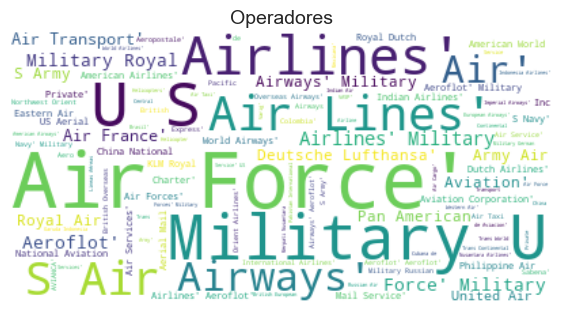

In [1841]:
# Basada en operador o aeronave
from wordcloud import WordCloud, STOPWORDS

text = str(df.Operador_aereo.tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.show()

In [1842]:
# Podemos observar que hay una presencia significativa de palabras referidas a uso militar

In [1843]:
# Verificamos si alguna de las siguientes palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos una nueva columna 'Categoria' y separamos los vuelos por Militar y No Militar
df['Categoria'] = np.where(df['Operador_aereo'].str.contains('|'.join(keywords), case=False), 'Militar', 'No Militar')

In [1844]:
# verificamos los datos de la nueva columna
df_grouped = df['Categoria'].value_counts()
df_grouped

Categoria
No Militar    4217
Militar        791
Name: count, dtype: int64

Número de vuelo

In [1845]:
# Primero, verificamos si la columna "Numero_vuelo" contiene valores '?'
vacios = (df['Numero_vuelo'] == '?').sum()
print(vacios)

3682


In [1846]:
# Reemplazamos los valores '?' por un valor vacío
df['Numero_vuelo'] = df['Numero_vuelo'].str.replace('?', '')

In [1847]:
# Obtenemos los valores únicos de la columna 'flight_no'
valores_unicos = df['Numero_vuelo'].unique()

# Hechamos un vistazo a los valores
for valor in valores_unicos:
    print(valor)


F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40
771


Ruta

In [1848]:
# Analizamos algunas de las rutas
df.Ruta.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [1849]:
# Primero, verificamos si la columna "Ruta" contiene valores '?'
vacios = (df['Ruta'] == '?').sum()
print(vacios)

762


In [1850]:
# Reemplazamos los valores '?' por un valor vacío
df['Ruta'] = df['Ruta'].str.replace('?', '')

# Reemplazamos los valores nulos por un valor vacío
df['Ruta'] = df['Ruta'].fillna('')

In [1851]:
# Obtenemos los valores únicos de la columna 'Ruta'
valores_unicos = df['Ruta'].unique()

# Revisamos los valores
for valor in valores_unicos:
    print(valor)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

In [1852]:
df.Ruta.nunique()

3838

In [1853]:
# La columna Ruta nos muestra el lugar de comienzo y destino del avion siniestrado, mas no el lugar
# específico donde ocurrió el accidente.
# Para usos prácticos, usaremos solo las columnas de 'Pais' y 'Superficie' para el análisis respecto
# a la ubicación del accidente.

Tipo de avión

In [1854]:
# Analizamos las aeronaves
df.Tipo_avion.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [1855]:
# Primero, verificamos si la columna "Tipo_avion" contiene valores '?'
vacios = (df['Tipo_avion'] == '?').sum()
print(vacios)

13


In [1856]:
# Reemplazamos los valores '?' por un valor vacío
df['Tipo_avion'] = df['Tipo_avion'].str.replace('?', '')

In [1857]:
# Vemos los diferentes tipos de aviones
df.Tipo_avion.nunique()

2469

In [1858]:
# Para darle una mejor categorización, se decide tomar 50 de las marcas más famosas para crear una
# nueva columna 'Marca'

marcas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
            'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
            'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
            'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
            'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
            'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
            'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
            'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
            'Harbin Aircraft Manufacturing Corporation', 'English Electric',
            'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
            'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
            'Sopwith Aviation Company']

In [1859]:
# Función para asignar valores a la columna 'Marca'
def asignar_marca(aircraft_type):
    for brand in marcas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'Otro'

# Aplicamos la función a la columna 'Tipo_avion' para crear la columna 'Marca'
df['Marca'] = df['Tipo_avion'].apply(asignar_marca)

Total personas a bordo

In [1860]:
# Primero, verificamos si la columna "Total_a_bordo" contiene valores '?'
vacios = (df['Total_a_bordo'] == '?').sum()
print(vacios)

17


In [1861]:
# Reemplazamos los valores '?' por un valor vacío
df['Total_a_bordo'] = df['Total_a_bordo'].str.replace('?', '')

# Convertimos la columna 'Total_a_bordo' a tipo numérico 
df['Total_a_bordo'] = pd.to_numeric(df['Total_a_bordo'], errors='coerce')


In [1862]:
# Verificamos los cambios
df.Total_a_bordo.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: Total_a_bordo
Non-Null Count  Dtype  
--------------  -----  
4991 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [1863]:
df.Total_a_bordo.nunique()

244

In [1864]:
# Filtramos el DataFrame para registros con 'Total_a_bordo' vacío
vacios = df[df['Total_a_bordo'].isna()]
vacios

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca
26,1919-07-21,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,,Shuttle,FD Type Dirigible,NaN,?,?,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi...",United States,Tierra,No Militar,Otro
103,1925-09-07,NaN,"Toul, France",CIDNA,,,Spad 33,NaN,?,?,?,?,?,?,France,Tierra,No Militar,Otro
347,1934-08-10,NaN,"Ningbo, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,China,Tierra,No Militar,Sikorsky Aircraft Corporation
384,1935-08-13,NaN,"Hangow, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,Destoryed in a storm.,China,Tierra,No Militar,Sikorsky Aircraft Corporation
451,1936-12-26,NaN,"Nanking, China",China National Aviation Corporation,,,Douglas DC-2,NaN,?,?,?,?,?,?,China,Tierra,No Militar,McDonnell Douglas
652,1942-10-01,NaN,"Kunming, China",China National Aviation Corporation,,,Douglas C-47,NaN,?,?,?,?,?,Crashed while attempting to land after losing ...,China,Tierra,No Militar,McDonnell Douglas
754,1944-11-09,NaN,"Seljord, Norway",Military - U.S. Army Air Corps,,,,NaN,?,?,?,?,?,?,Norway,Tierra,Militar,Otro
854,1946-03-18,NaN,"Between Chungking and Shanghai, China",China National Aviation Corporation,,Chunking - Shanghai,,NaN,?,?,?,?,?,Disappeared while en route. Plane never located.,China,Tierra,No Militar,Otro
1231,1951-01-20,NaN,"Huilyo, Peru",Military - TAM,,,Douglas DC-3,NaN,?,?,16,?,?,?,Peru,Tierra,Militar,McDonnell Douglas
1362,1952-12-22,NaN,"Damascus, Syria",Syrian Air,,,Douglas DC-3,NaN,?,?,9,?,?,?,Syria,Tierra,No Militar,McDonnell Douglas


In [1865]:
# Filtramos el DataFrame para registros con 'total_aboard' igual a 0
ceros = df.loc[df['Total_a_bordo'] == 0]
ceros

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca
30,1919-10-20,NaN,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...,Otro,Agua,No Militar,De Havilland
120,1927-01-12,NaN,"Estaires, France",Fokker,,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...,France,Tierra,No Militar,Fokker
1121,1949-07-13,NaN,"Jamnagar, Gujarat state, India",Indian Air Force,,Training,Hawker Hunter,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...,India,Tierra,Militar,Hawker
3144,1981-09-22,12:00,"Near Babaeski, Turkey",Military - Turkish Air Force,,,Northrop F-5A,0.0,0,0,0,0,0,The fighter crashed into a village after the p...,Turkey,Tierra,Militar,Northrop Grumman
3376,1986-03-27,NaN,"Bangui, Central African Republic",Military - French Air Force,,,Sepecat Jaguar A,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...,Central African Republic,Tierra,Militar,Otro


In [1866]:
# Eliminamos los registros que tienen vacíos al no ser relevantes en número, además de no ser útiles para el análisis
df = df.dropna(subset=['Total_a_bordo'])

In [1867]:
# Del mismo modo eliminamos los siniestros con 0 muertes ya que no representan un número significativo de los datos
df = df.drop(df[df['Total_a_bordo'] == 0].index)

Pasajeros a bordo

In [1868]:
# Primero, verificamos si la columna "Pasajeros" contiene valores '?'
vacios = (df['Pasajeros'] == '?').sum()
print(vacios)

204


In [1869]:
# Reemplazamos los valores '?' por un valor vacío
df['Pasajeros'] = df['Pasajeros'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['Pasajeros'] = pd.to_numeric(df['Pasajeros'], errors='coerce')

Tripulación a bordo

In [1870]:
# Primero, verificamos si la columna "Tripulación" contiene valores '?'
vacios = (df['Tripulación'] == '?').sum()
print(vacios)

202


In [1871]:
# Reemplazamos los valores '?' por un valor vacío
df['Tripulación'] = df['Tripulación'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['Tripulación'] = pd.to_numeric(df['Tripulación'], errors='coerce')

In [1872]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_abroad' y 'crew_aboard' son nulos
filtered_df = df[df['Pasajeros'].isnull() & df['Tripulación'].isnull()]
filtered_df


,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,The airship flew into a thunderstorm and encou...,Otro,Agua,Militar,Otro
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,Tierra,Militar,Otro
7,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,Tierra,Militar,Otro
8,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,"Crashed near the Black Sea, cause unknown.",Otro,Tierra,Militar,Otro
9,1916-09-24,01:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,Shot down by British aircraft crashing in flames.,England,Tierra,Militar,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,NaN,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,,Mi-8,28.0,NaN,NaN,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,Tierra,Militar,Otro
4791,2010-11-25,12:07,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,"The helicopter, which was delivering workers t...",Russia,Tierra,No Militar,Otro
4802,2011-04-19,13:57,"Tawang, India",Pawan Hans Helicopters Ltd.,,,Mil Mi-172,23.0,NaN,NaN,18,?,?,The helicopter crashed into a hill as it attem...,India,Tierra,No Militar,Otro
4813,2011-08-06,NaN,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,Tierra,Militar,Boeing


In [1873]:
# No haremos modificaciones pero debemos considerar que probablemente no podamos analizar para dichos registros esas características porque tenemos datos faltantes

Fallecimientos

In [1874]:
# Primero, verificamos si la columna "Fallecidos" contiene valores '?'
vacios = (df['Fallecidos'] == '?').sum()
print(vacios)

0


In [1875]:
# Reemplazamos los valores '?' por un valor vacío
df['Fallecidos'] = df['Fallecidos'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['Fallecidos'] = pd.to_numeric(df['Fallecidos'], errors='coerce')

Pasajeros fallecidos en el siniestro

In [1876]:
# Primero, verificamos si la columna "Pasajeros_fallecidos" contiene valores '?'
vacios = (df['Pasajeros_fallecidos'] == '?').sum()
print(vacios)

221


In [1877]:
# Reemplazamos los valores '?' por un valor vacío
df['Pasajeros_fallecidos'] = df['Pasajeros_fallecidos'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['Pasajeros_fallecidos'] = pd.to_numeric(df['Pasajeros_fallecidos'], errors='coerce')

Tripulación fallecida en el siniestro

In [1878]:
# Primero, verificamos si la columna "Tripulación_fallecida" contiene valores '?'
vacios = (df['Tripulación_fallecida'] == '?').sum()
print(vacios)

220


In [1879]:
# Reemplazamos los valores '?' por un valor vacío
df['Tripulación_fallecida'] = df['Tripulación_fallecida'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico
df['Tripulación_fallecida'] = pd.to_numeric(df['Tripulación_fallecida'], errors='coerce')

In [1880]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_fatalities' y 'crew_fatalities' son nulos
filtered_df = df[df['Pasajeros_fallecidos'].isnull() & df['Tripulación_fallecida'].isnull()]
filtered_df

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,Otro,Agua,Militar,Otro
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,Germany,Tierra,Militar,Otro
7,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",Germany,Tierra,Militar,Otro
8,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",Otro,Tierra,Militar,Otro
9,1916-09-24,01:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,England,Tierra,Militar,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,NaN,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",Afghanistan,Tierra,Militar,Boeing
4833,2012-03-16,10:45,"Kabul, Afghanistan",Military - Turkish Army (NATO),,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,Afghanistan,Tierra,Militar,Sikorsky Aircraft Corporation
4848,2012-10-07,12:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",Sudan,Tierra,Militar,Antonov
4894,2014-07-07,07:50,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,Vietnam,Tierra,Militar,Otro


No haremos modificaciones pero debemos considerar que probablemente no podamos analizar para dichos registros para esas características porque tenemos datos faltantes

Supervivientes

In [1881]:
# Creamos una nueva columna 'Supervivientes' calculando la diferencia entre las columnas 'Total_a_bordo' y 'Fallecidos'
df['Supervivientes'] = df['Total_a_bordo'] - df['Fallecidos']

In [1882]:
# Revisamos la información de la nueva columna
df.Supervivientes.info()

<class 'pandas.core.series.Series'>
Index: 4986 entries, 0 to 5007
Series name: Supervivientes
Non-Null Count  Dtype  
--------------  -----  
4986 non-null   float64
dtypes: float64(1)
memory usage: 77.9 KB


#### d) Búsqueda de valores duplicados

In [1883]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca,Supervivientes


No hay duplicados y por ende no realizamos acción alguna

#### e) Búsqueda de valores nulos

In [1884]:
df.isna().sum()

Fecha                       0
Hora                     1488
Lugar                       0
Operador_aereo              0
Numero_vuelo                0
Ruta                        0
Tipo_avion                  0
Total_a_bordo               0
Pasajeros                 204
Tripulación               202
Fallecidos                  0
Pasajeros_fallecidos      221
Tripulación_fallecida     220
Resumen_accidente           0
Pais                        0
Superficie                  0
Categoria                   0
Marca                       0
Supervivientes              0
dtype: int64

In [1885]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df['Pasajeros'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df['Tripulación'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df['Pasajeros_fallecidos'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df['Tripulación_fallecida'].isna().sum()*100/df.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  4.09%.
El porcentaje de valores nulos en tripulación a bordo es  4.05%.
El porcentaje de valores nulos en fatalidades en pasajeros es  4.43%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  4.41%.


El pocentaje de valores nulos es menor al 5% porciento en cada columna que los presenta. Se decide conservar los registros con valores nulos para no reducir la base de datos, mas es necesario aclarar que no se vaa poder trabajar de manera adecuada con las columnas que presentan valores nulos. 

### 4) Análisis descriptivo

#### Medidas descriptivas

In [1886]:
df.describe()

,Fecha,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Supervivientes
count,4986,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4986.000000
mean,1971-06-16 18:21:30.974729296,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,8.810469
min,1908-09-17 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-29 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-10-05 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-04-15 12:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,3.750000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000
std,NaN,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,30.653307


Estos datos nos muestran una primera aproximación acerca de las columnas numéricas presentes en la base de datos

#### Histogramas

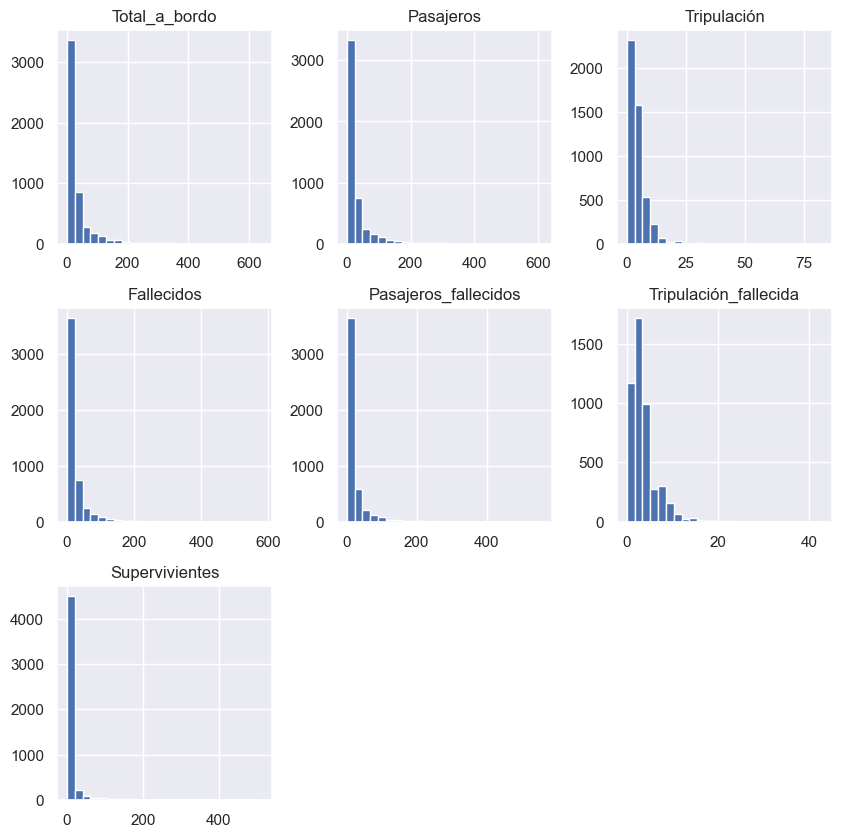

In [1887]:
columns = ['Total_a_bordo', 'Pasajeros', 'Tripulación', 'Fallecidos', 'Pasajeros_fallecidos', 'Tripulación_fallecida', 'Supervivientes']
df[columns].hist(bins=25, figsize= (10, 10))
plt.show()

Las distribuciones presentan un sesgo hacia la derecha, y todas parecen tener una distribución similar

#### Outliers

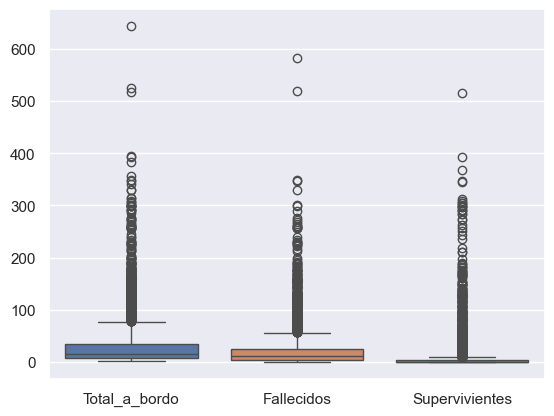

In [1888]:
# Graficamos las siguientes variables, las cuales no poseen valores nulos
sns.boxplot(data=df[['Total_a_bordo', 'Fallecidos', 'Supervivientes']])
plt.show()

Podemos ver que hay una cantidad considerable de outliers en las columnas

##### a) Outliers Total_a_bordo

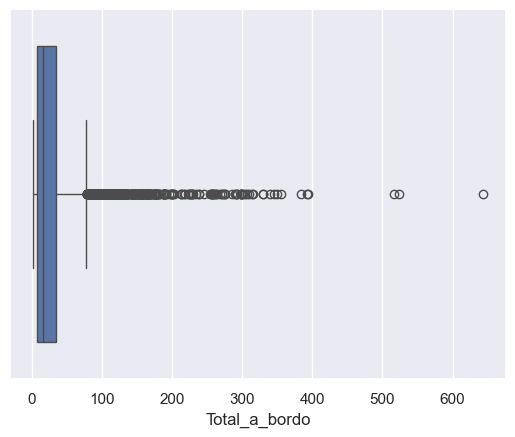

El rango intercuartil (IQR) de Total_a_bordo es 28.0
-35.0 77.0


,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca,Supervivientes
364,1935-02-12,NaN,"Off Point Sur, Californiia",Military - US Navy,,,Goodyear-Zeppelin U.S.S. Macon (airship),83.0,0.0,83.0,2,0.0,2.0,The airship suffered structural failure in a s...,Otro,Tierra,Militar,Otro,81.0
462,1937-05-06,19:25,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,LZ 129,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35,13.0,22.0,The airship Hindenburg caught fire and burned ...,United States,Tierra,No Militar,Otro,62.0
1116,1949-06-07,00:25,"San Juan, Puerto Rico",Strato Freight,,San Juan - Miami,Curtiss C-46D-5-CU,81.0,75.0,6.0,53,52.0,1.0,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,Tierra,No Militar,Otro,28.0
1165,1950-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,Otro,Tierra,No Militar,Avro,3.0
1360,1952-12-20,06:30,"Moses Lake, Washington",Military - U.S. Air Force,,,Douglas C-124A Globemaster,115.0,105.0,10.0,87,82.0,5.0,Within two minutes after takeoff the aircraft ...,United States,Tierra,Militar,McDonnell Douglas,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2020-01-08,06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,Tierra,No Militar,Boeing,0.0
4995,2020-02-05,18:19,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,Tierra,No Militar,Boeing,174.0
4997,2020-05-22,14:40,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,Tierra,No Militar,Airbus,2.0
4998,2020-08-07,19:14,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,Tierra,No Militar,Boeing,170.0


In [1889]:
# Filtramos outliers de la columna 'Total_a_bordo'

sns.boxplot(data = df, x = 'Total_a_bordo')
plt.show()

# IQR
Q1 = np.percentile(df['Total_a_bordo'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Total_a_bordo'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de Total_a_bordo es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['Total_a_bordo']<lower_lim) | (df['Total_a_bordo']>upper_lim)]

Hay un número considerable de outliers, por lo que pasamos a revisar los más extremos, tomando como referencia un valor de 500 para el número de pasajeros a bordo

In [1890]:
# Procedemos a revisar los vuelos con más de 500 personas a bordo
df[(df['Total_a_bordo']>500)]

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca,Supervivientes
2902,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583,560.0,23.0,Both aircraft were diverted to Tenerife becaus...,Otro,Tierra,No Militar,Boeing,61.0
3341,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520,505.0,15.0,The aircraft suffered an aft pressure bulkhead...,Japan,Tierra,No Militar,Boeing,4.0
4219,1999-07-23,11:25,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1,0.0,1.0,Two minutes after taking off from Haneda Airpo...,Japan,Tierra,No Militar,Boeing,516.0


Observamos que los registros con número de pasajeros mayor a 500 son correctos, el primero es el resultado de un choque entre aviones, sumando los decesos de ambos en un mismo registro, los otros 2 también son consistentes 

##### b) Outliers Fallecidos

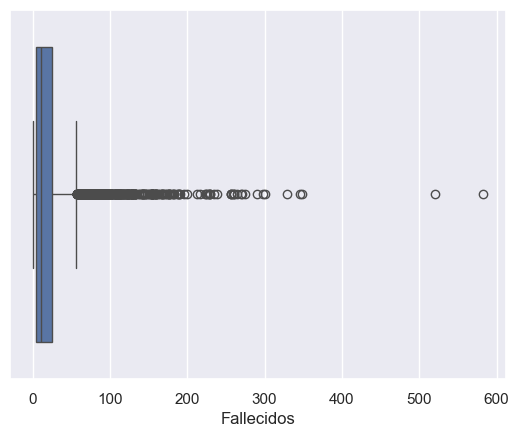

El rango intercuartil (IQR) de la columna Fallecidos es 21.0
-27.5 56.5


,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca,Supervivientes
311,1933-04-04,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,,,Goodyear-Zeppelin U.S.S. Akron (airship),76.0,NaN,NaN,73,NaN,NaN,"While cruising at 1,600 feet off New Jersey, s...",United States,Tierra,Militar,Otro,3.0
814,1945-10-16,11:30,"Near Peking, China",Military - U.S. Army Air Forces,,Hankou - Peking,Curtiss-Wright C-46F-CU,59.0,55.0,4.0,59,55.0,4.0,Struck a radio transmission tower while on app...,China,Tierra,Militar,Curtiss-Wright Corporation,0.0
1165,1950-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,Otro,Tierra,No Militar,Avro,3.0
1183,1950-06-23,23:25,"Lake Michigan, 18 NNW of Benton Harbor, Michigan",Northwest Orient Airlines,2501,New York City - Minneapolis - Spokan -Seattle,Douglas DC-4,58.0,55.0,3.0,58,55.0,3.0,"En route from New York to Minneapolis, the air...",United States,Tierra,No Militar,McDonnell Douglas,0.0
1211,1950-11-13,18:00,"Mt. Tete de L'Obiou, France",Curtiss-Reid Flying Services Ltd. (Canada),,Rome - Paris,Douglas C-54B-1-DC,58.0,51.0,7.0,58,51.0,7.0,The aircraft drifted 50 miles off the prescrib...,France,Tierra,No Militar,McDonnell Douglas,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,2018-10-29,06:31,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189.0,181.0,8.0,189,181.0,8.0,"The airliner crashed into the Jakarta Sea, 13 ...",Indonesia,Tierra,No Militar,Boeing,0.0
4983,2019-03-10,08:44,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,157.0,149.0,8.0,157,149.0,8.0,The internationally scheduled airliner crashed...,Ethiopia,Tierra,No Militar,Boeing,0.0
4994,2020-01-08,06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,Tierra,No Militar,Boeing,0.0
4997,2020-05-22,14:40,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,Tierra,No Militar,Airbus,2.0


In [1891]:
# Filtramos outliers de la columna 'Fallecidos'
sns.boxplot(data = df, x = 'Fallecidos')
plt.show()

# IQR
Q1 = np.percentile(df['Fallecidos'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Fallecidos'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de la columna Fallecidos es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['Fallecidos']<lower_lim) | (df['Fallecidos']>upper_lim)]

Tenemos muchos outliers, por lo que para revisar la consistencia de nuestros datos, revisamos que la cantidad de fallecidos en el siniestro no supere la cantidad de personas que abordaron el avión

In [1892]:
# Verificamos la consistencia de los datos
df[df['Fallecidos'] > df['Total_a_bordo']]

,Fecha,Hora,Lugar,Operador_aereo,Numero_vuelo,Ruta,Tipo_avion,Total_a_bordo,Pasajeros,Tripulación,Fallecidos,Pasajeros_fallecidos,Tripulación_fallecida,Resumen_accidente,Pais,Superficie,Categoria,Marca,Supervivientes


No tomaremos ninguna acción respecto a los outliers, al realizar la confirmación de la consistencia de estos, podemos demostrar que son datos válidos para nuestro análisis

#### Gráficos de barras

In [1893]:
#Identificamos columnas catégoricas
categorical_data = df.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['Fecha', 'Hora', 'Lugar', 'Operador_aereo', 'Numero_vuelo', 'Ruta', 'Tipo_avion', 'Resumen_accidente', 'Pais', 'Superficie', 'Categoria', 'Marca']


#### Accidentes

##### Cuántos accidentes estamos analizando?

In [1894]:
print('La cantidad de registros en el dataset que estamos analizando es de', df.shape[0])

La cantidad de registros en el dataset que estamos analizando es de 4986


In [1895]:
df.shape

(4986, 19)

##### Cuál es el país con mayor cantidad de accidentes?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\2149129606.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pais', y='Conteo_Accidentes', data=top_countries, palette='plasma')


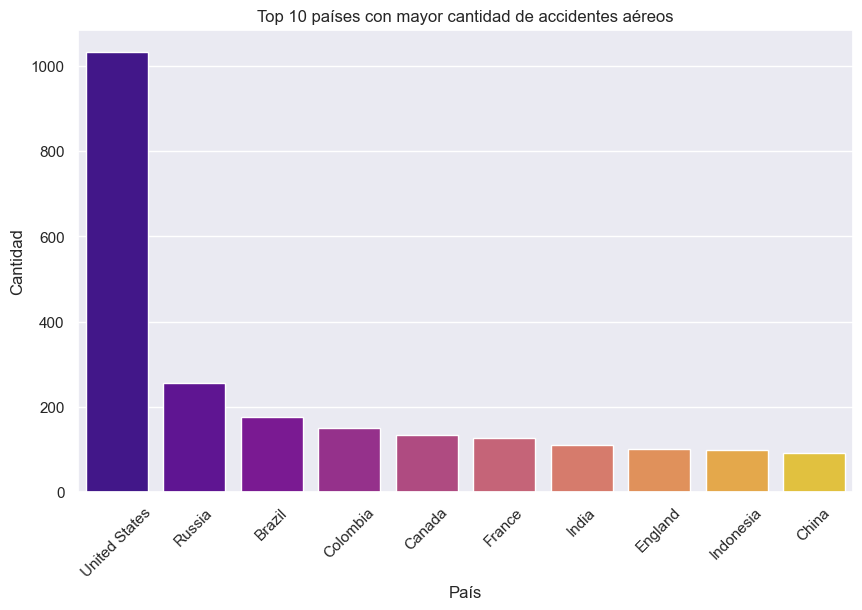

In [1896]:
# Filtramos los datos para excluir la categoría 'Otro'
filtered_data = df[df['Pais'] != 'Otro']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['Pais'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Pais': country_counts.index, 'Conteo_Accidentes': country_counts.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Pais', y='Conteo_Accidentes', data=top_countries, palette='plasma')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [1897]:
# Observamos los valores
top_countries

,Pais,Conteo_Accidentes
0,United States,1034
1,Russia,255
2,Brazil,175
3,Colombia,150
4,Canada,133
5,France,127
6,India,111
7,England,101
8,Indonesia,99
9,China,92


Según lo que podemos apreciar en los datos, Estados Unidos es el país con más accidentes registrados, seguido muy de lejos por Rusia y Brasil

##### El operador aéreo con mayor cantidad de accidentes

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\3923524349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteo_Accidentes', y='Operador', data=top_operators, palette='plasma')


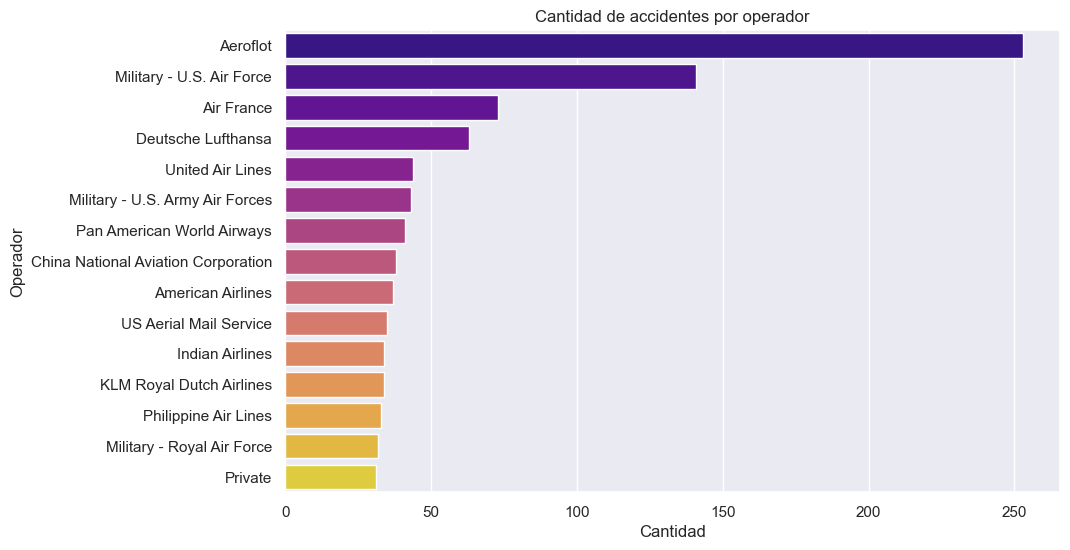

In [1898]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
operator_counts = df['Operador_aereo'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operador': operator_counts.index, 'Conteo_Accidentes': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Conteo_Accidentes', y='Operador', data=top_operators, palette='plasma')
plt.title('Cantidad de accidentes por operador')
plt.xlabel('Cantidad')
plt.ylabel('Operador')
plt.show()

In [1899]:
# Observamos los valores
top_operators

,Operador,Conteo_Accidentes
0,Aeroflot,253
1,Military - U.S. Air Force,141
2,Air France,73
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,Pan American World Airways,41
7,China National Aviation Corporation,38
8,American Airlines,37
9,US Aerial Mail Service,35


Según los datos analizados, el operador aéreo Aeroflot es la compañía que más accidentes ha tenido, seguido por la fuerza militar aérea estadounidense y por Air France

##### El tipo de avión con más accidentes

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\3701385408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteo_Accidentes', y='Tipo', data=top_aircrafts, palette='plasma')


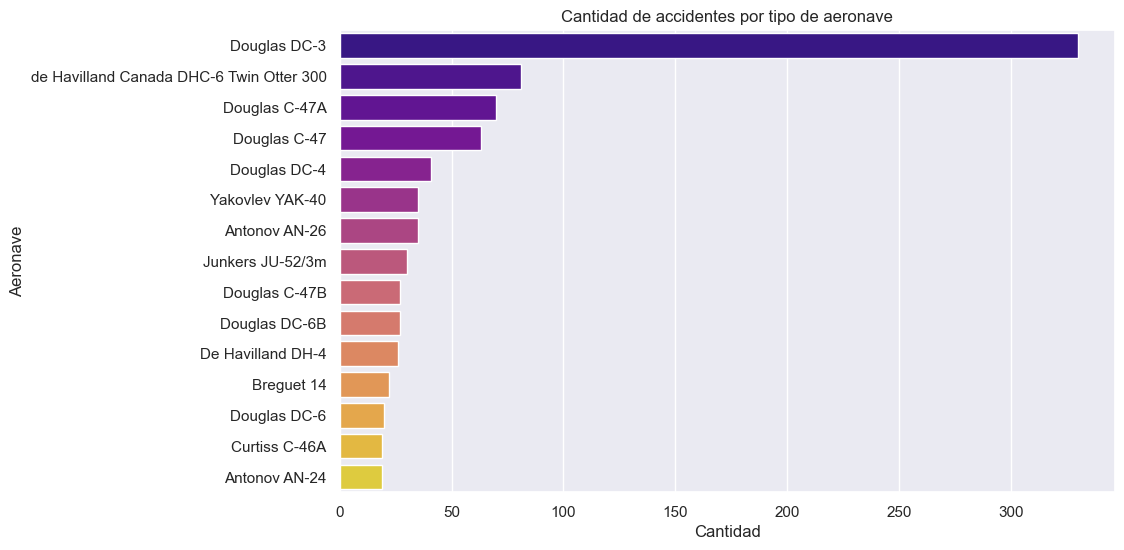

In [1900]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
operator_counts = df['Tipo_avion'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_aircrafts = pd.DataFrame({'Tipo': operator_counts.index, 'Conteo_Accidentes': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Conteo_Accidentes', y='Tipo', data=top_aircrafts, palette='plasma')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.show()

In [1901]:
# Observamos los valores
top_aircrafts

,Tipo,Conteo_Accidentes
0,Douglas DC-3,330
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,63
4,Douglas DC-4,41
5,Yakovlev YAK-40,35
6,Antonov AN-26,35
7,Junkers JU-52/3m,30
8,Douglas C-47B,27
9,Douglas DC-6B,27


El tipo de avión Douglas DC-3 es el que se presenta en mayor medida en los accidentes, seguido de lejos por los tipos de aviones de Havilland Canada DHC-6 Twin Otter 300 y el Douglas C-47A respectivamente

##### La marca de aeronave con mayor cantidad de accidentes

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1448868325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteo_Accidentes', y='Marca', data=top_brands, palette='plasma')


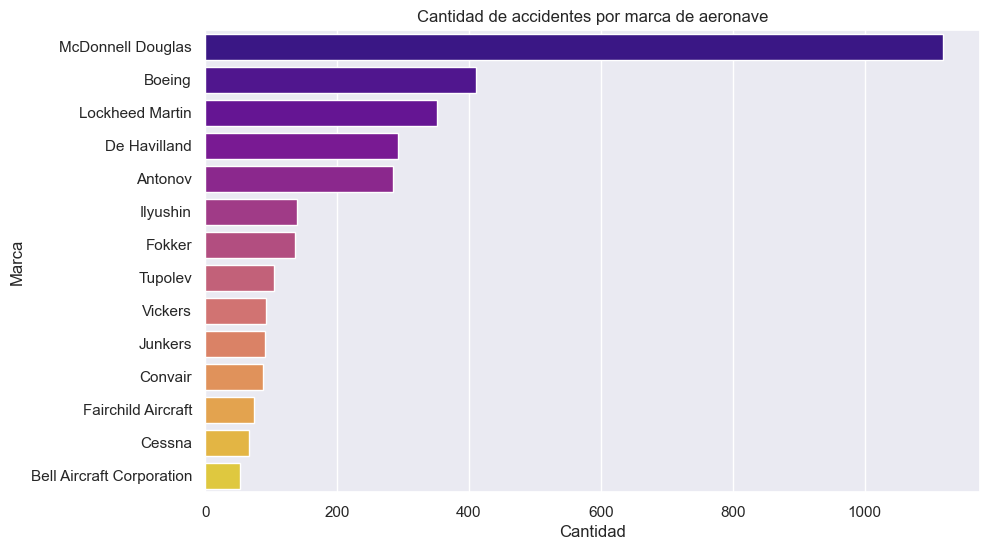

In [1902]:
# Calculamos el recuento de accidentes por marca (tomamos las 15 más representativas)
operator_counts = df['Marca'].value_counts().head(15)

# Filtrar 'other' del recuento
operator_counts = operator_counts[operator_counts.index != 'Otro']

# Creamos un DataFrame con los datos de recuento
top_brands = pd.DataFrame({'Marca': operator_counts.index, 'Conteo_Accidentes': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Conteo_Accidentes', y='Marca', data=top_brands, palette='plasma')
plt.title('Cantidad de accidentes por marca de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.show()

In [1903]:
# Observamos los valores
top_brands

,Marca,Conteo_Accidentes
0,McDonnell Douglas,1119
1,Boeing,410
2,Lockheed Martin,351
3,De Havilland,292
4,Antonov,285
5,Ilyushin,140
6,Fokker,137
7,Tupolev,105
8,Vickers,93
9,Junkers,91


En el caso de las marcas, McDonnell Douglas es la que tiene una mayor incidencia en los accidentes, una aclaración respecto a esta marca es que esta ya existe, ya que se fusionó con Boeing el año 1997

##### Vuelos militares vs no militares

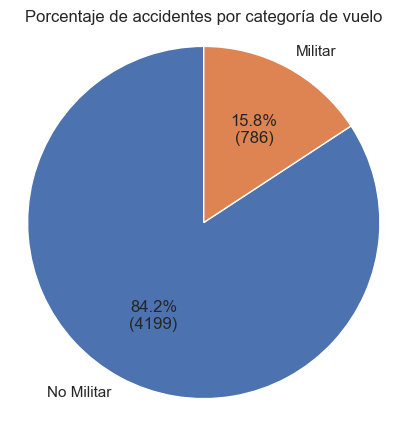

In [1904]:
# Calculamos el recuento de accidentes por categoría
category_counts = df['Categoria'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.show()

In [1905]:
# Observamos los valores
category_counts

Categoria
No Militar    4200
Militar        786
Name: count, dtype: int64

Según los datos, han ocurrido un mayor número de accidentes en vuelos no militares que en vuelos militares

#### Fallecimientos

Cuál fue el vuelo con mayor fatalidad y qué sucedió en el mismo?

In [1906]:
# Obtenemos el índice del vuelo con mayor número de fatalidades
indice_max_fatalidades = df['Fallecidos'].idxmax()

# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df.loc[indice_max_fatalidades, 'Numero_vuelo']
descripcion_suceso_max_fatalidades = df.loc[indice_max_fatalidades, 'Resumen_accidente']
num_fatalidades_max_fatalidades = df.loc[indice_max_fatalidades, 'Fallecidos']
operador_max_fatalidades = df.loc[indice_max_fatalidades, 'Operador_aereo']

# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)


Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety o

##### Qué operador tuvo mayor cantidad de fatalidades?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1397599458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Operador_aereo', x='Fallecidos', data=fatalities_by_operator, palette='plasma')


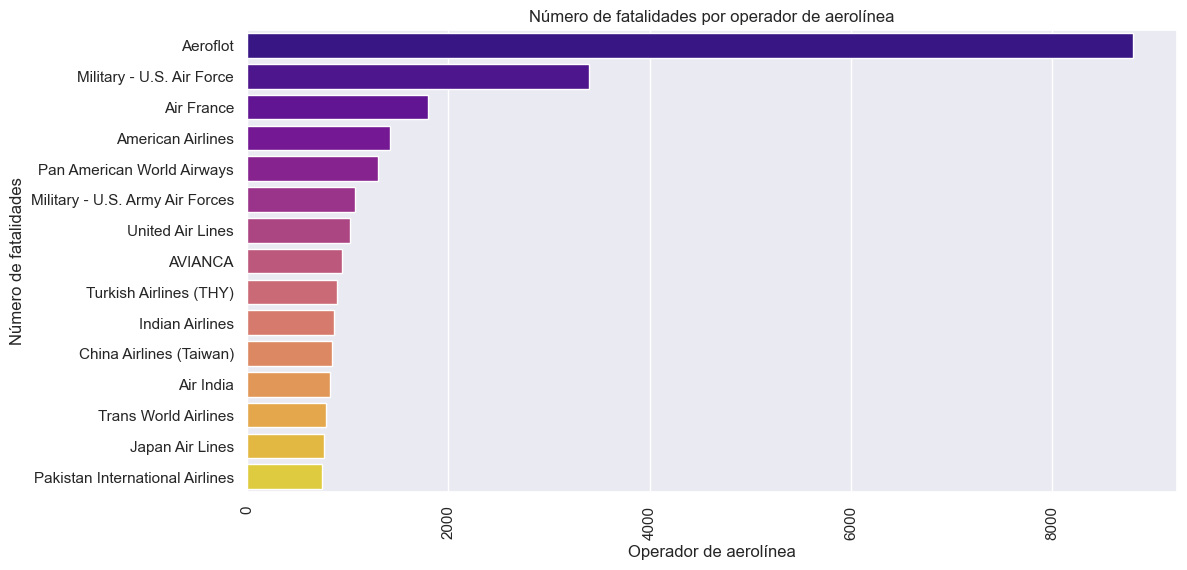

In [1907]:
# Agrupamos por operador
fatalities_by_operator = df.groupby('Operador_aereo')['Fallecidos'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
fatalities_by_operator = fatalities_by_operator.nlargest(15, 'Fallecidos')

#Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(y='Operador_aereo', x='Fallecidos', data=fatalities_by_operator, palette='plasma')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()


In [1908]:
# Observamos los valores
fatalities_by_operator

,Operador_aereo,Fallecidos
80,Aeroflot,8802
1399,Military - U.S. Air Force,3395
188,Air France,1797
353,American Airlines,1422
1594,Pan American World Airways,1303
1409,Military - U.S. Army Air Forces,1070
2143,United Air Lines,1019
22,AVIANCA,941
2108,Turkish Airlines (THY),890
974,Indian Airlines,860


Aeroflot es el operador con mayor cantidad de fatalidades

##### Qué aeronave presentó mayor cantidad de fatalidades a lo largo de los años?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\2599827210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fallecidos', y='Tipo_avion', data=top_aircraft_fatalities, palette='plasma')


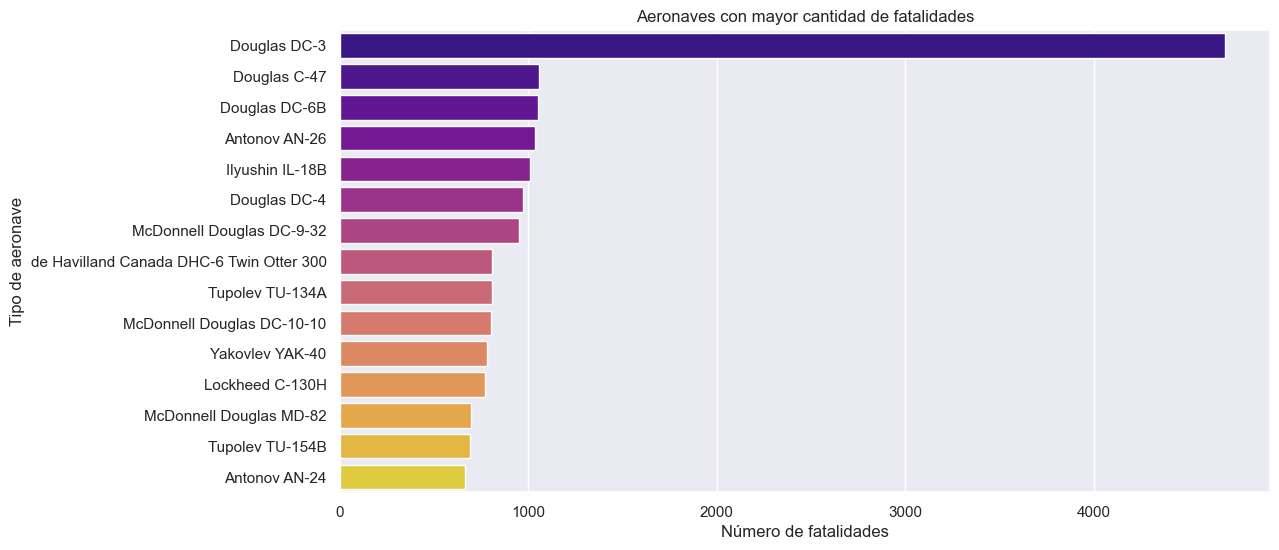

In [1909]:
# Agrupamos por tipo de aeronave
fatalities_by_aircraft = df.groupby('Tipo_avion')['Fallecidos'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_aircraft_fatalities = fatalities_by_aircraft.nlargest(15, 'Fallecidos')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='Fallecidos', y='Tipo_avion', data=top_aircraft_fatalities, palette='plasma')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.show()



In [1910]:
# Observamos los valores
top_aircraft_fatalities

,Tipo_avion,Fallecidos
1129,Douglas DC-3,4699
1030,Douglas C-47,1059
1198,Douglas DC-6B,1051
143,Antonov AN-26,1038
1547,Ilyushin IL-18B,1008
1181,Douglas DC-4,972
1886,McDonnell Douglas DC-9-32,953
2396,de Havilland Canada DHC-6 Twin Otter 300,810
2225,Tupolev TU-134A,807
1850,McDonnell Douglas DC-10-10,804


El douglas DC-3 es el tipo de avión presenta la mayor cantidad de fatalidades

##### Qué marca tuvo la mayor cantidad de fatalidades?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1808845555.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fallecidos', y='Marca', data=top_brand_fatalities, palette='plasma')


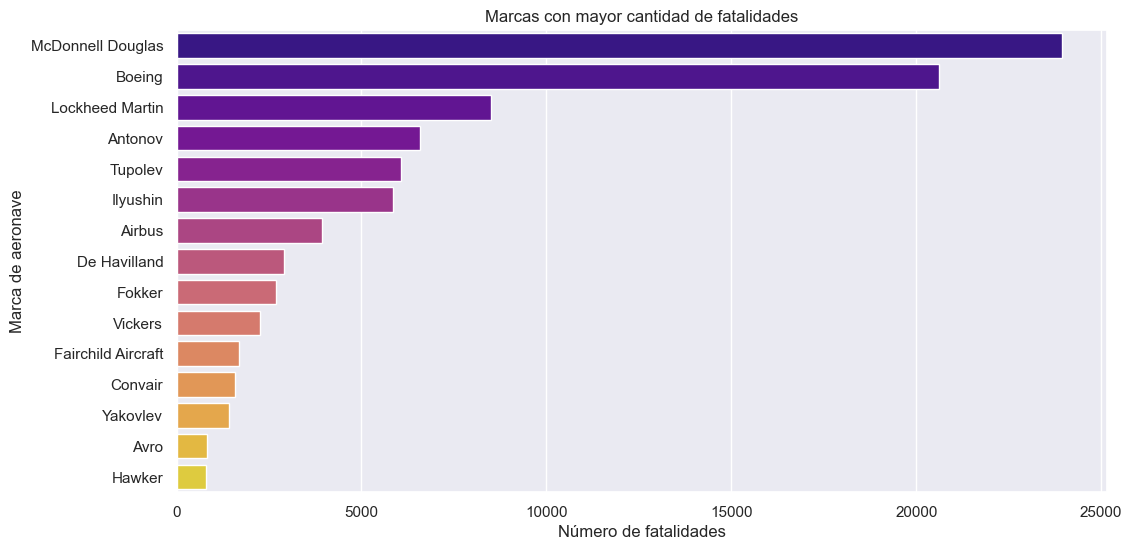

In [1911]:
# Filtramos 'other' del recuento
data_filtered = df[df['Marca'] != 'Otro']

# Agrupamos por tipo de marca
fatalities_by_brand = data_filtered.groupby('Marca')['Fallecidos'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'Fallecidos')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='Fallecidos', y='Marca', data=top_brand_fatalities, palette='plasma')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.show()


In [1912]:
# Observamos los valores
top_brand_fatalities

,Marca,Fallecidos
25,McDonnell Douglas,23945
8,Boeing,20614
24,Lockheed Martin,8515
1,Antonov,6573
37,Tupolev,6064
21,Ilyushin,5843
0,Airbus,3922
14,De Havilland,2909
17,Fokker,2701
38,Vickers,2252


Douglas es la marca que presenta la mayor cantidad de fallecidos

#### Supervivientes

##### Cuáles aerolíneas resultaron más seguras?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\459670148.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Supervivientes', y='Operador_aereo', data=top_airline_survivors, palette='plasma')


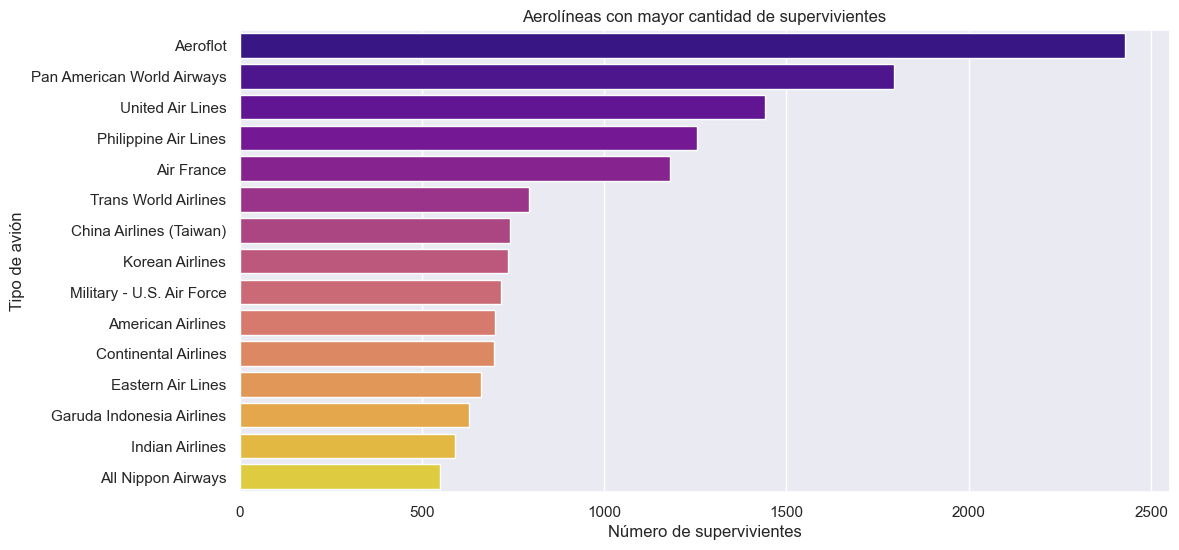

In [1913]:
# Calculamos los supervivientes por aeronave
survivors_by_airline = df.groupby('Operador_aereo')['Supervivientes'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_airline_survivors = survivors_by_airline.nlargest(15, 'Supervivientes')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='Supervivientes', y='Operador_aereo', data=top_airline_survivors, palette='plasma')
plt.xlabel('Número de supervivientes')
plt.ylabel('Tipo de avión')
plt.title('Aerolíneas con mayor cantidad de supervivientes')
plt.show()

In [1914]:
# Observamos los valores
top_airline_survivors

,Operador_aereo,Supervivientes
80,Aeroflot,2429.0
1594,Pan American World Airways,1794.0
2143,United Air Lines,1442.0
1639,Philippine Air Lines,1256.0
188,Air France,1181.0
2051,Trans World Airlines,793.0
625,China Airlines (Taiwan),743.0
1065,Korean Airlines,737.0
1399,Military - U.S. Air Force,718.0
353,American Airlines,700.0


Pese a tener la cantidad mayor de accidentes y fatalidades, Aeroflot posee el mayor número de sobrevivientes

##### Cuáles son los tipos de aviones que resultaron más seguros?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1344335097.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Supervivientes', y='Tipo_avion', data=top_aircraft_survivors, palette='plasma')


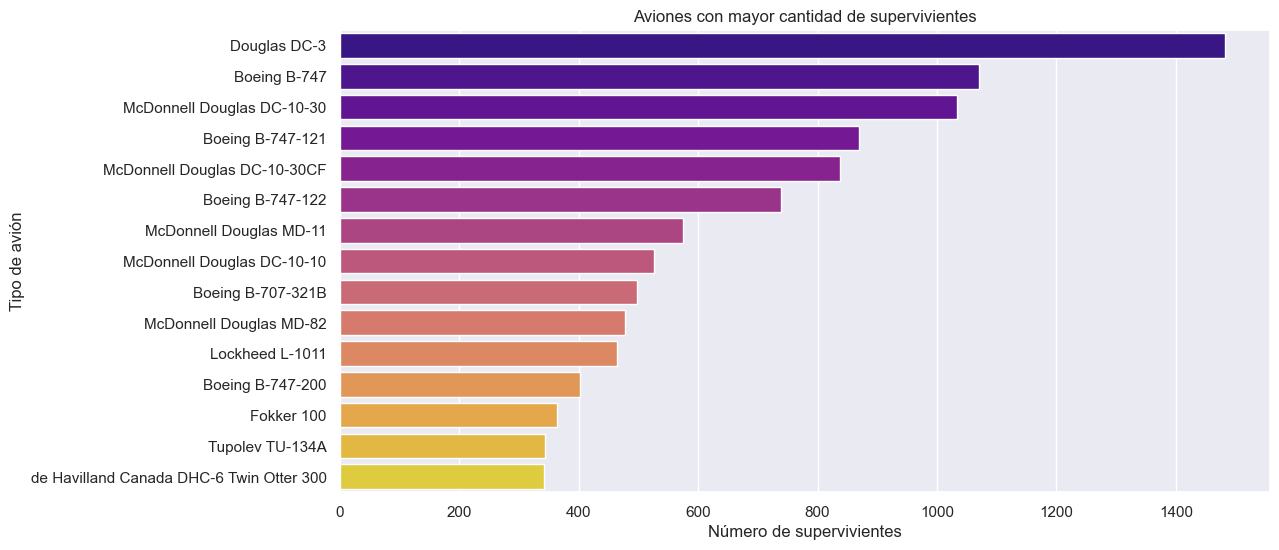

In [1915]:
# Calculamos los sobrevivientes por aeronave
survivors_by_aircraft = df.groupby('Tipo_avion')['Supervivientes'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_aircraft_survivors = survivors_by_aircraft.nlargest(15, 'Supervivientes')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='Supervivientes', y='Tipo_avion', data=top_aircraft_survivors, palette='plasma')
plt.xlabel('Número de supervivientes')
plt.ylabel('Tipo de avión')
plt.title('Aviones con mayor cantidad de supervivientes')
plt.show()


In [1916]:
# Observamos los valores
top_aircraft_survivors

,Tipo_avion,Supervivientes
1129,Douglas DC-3,1483.0
585,Boeing B-747,1070.0
1851,McDonnell Douglas DC-10-30,1033.0
586,Boeing B-747-121,870.0
1852,McDonnell Douglas DC-10-30CF,838.0
589,Boeing B-747-122,739.0
1891,McDonnell Douglas MD-11,574.0
1850,McDonnell Douglas DC-10-10,527.0
455,Boeing B-707-321B,497.0
1894,McDonnell Douglas MD-82,477.0


El Douglas DC-3, además de resultar el avión con mayor número de fatalidades y accidentes, es el que tiene la mayor cantidad de supervivientes. Quizás, porque la mayoría de vuelos al principio de la aviación utilizaban en este modelo, y al mismo tiempo que había un número alto de fatalidades también habría un número alto de sobrevivientes 

##### Qué marca resultó más segura?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\3012910702.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Supervivientes', y='Marca', data=top_brands_survivors, palette='plasma')


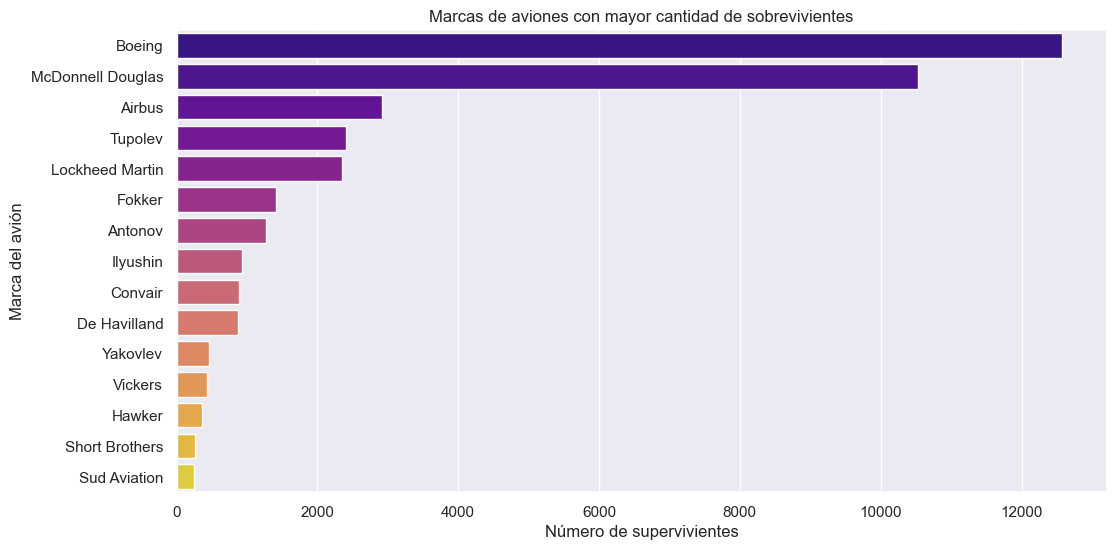

In [1917]:
# Filtramos 'Otros' del recuento
data_filtered = df[df['Marca'] != 'Otro']

# Calculamos los sobrevivientes por marca
survivors_by_brand = data_filtered.groupby('Marca')['Supervivientes'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_brands_survivors = survivors_by_brand.nlargest(15, 'Supervivientes')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='Supervivientes', y='Marca', data=top_brands_survivors, palette='plasma')
plt.xlabel('Número de supervivientes')
plt.ylabel('Marca del avión')
plt.title('Marcas de aviones con mayor cantidad de sobrevivientes')
plt.show()

In [1918]:
# Observamos los valores
top_brands_survivors

,Marca,Supervivientes
8,Boeing,12578.0
25,McDonnell Douglas,10534.0
0,Airbus,2923.0
37,Tupolev,2408.0
24,Lockheed Martin,2353.0
17,Fokker,1416.0
1,Antonov,1273.0
21,Ilyushin,927.0
12,Convair,894.0
14,De Havilland,870.0


La marca más segura resultó Boeing, esto posiblemente que al ser sucesora de McDonell Douglas, mejoró los estándares de seguridad con respecto al pasado 

### 5) Análisis temporal

#### Evolución de accidentes a lo largo de los años

##### a) Primer y último vuelo del dataset

In [1919]:
# Obtenemos el vuelo más antiguo
vuelo_mas_antiguo = df[df['Fecha'] == df['Fecha'].min()]
num_vuelo_antiguo = vuelo_mas_antiguo['Numero_vuelo'].values[0]
operador_antiguo = vuelo_mas_antiguo['Operador_aereo'].values[0]
fecha_antigua = vuelo_mas_antiguo['Fecha'].values[0]

# Obtenemos el vuelo más reciente
vuelo_mas_reciente = df[df['Fecha'] == df['Fecha'].max()]
num_vuelo_reciente = vuelo_mas_reciente['Numero_vuelo'].values[0]
operador_reciente = vuelo_mas_reciente['Operador_aereo'].values[0]
fecha_reciente = vuelo_mas_reciente['Fecha'].values[0]

# Imprimimos los resultados
print("Vuelo más antiguo:")
print("Número de vuelo:", num_vuelo_antiguo)
print("Operador de la aerolínea:", operador_antiguo)
print("Fecha:", fecha_antigua)
print()
print("Vuelo más reciente:")
print("Número de vuelo:", num_vuelo_reciente)
print("Operador de la aerolínea:", operador_reciente)
print("Fecha:", fecha_reciente)

Vuelo más antiguo:
Número de vuelo: 
Operador de la aerolínea: Military - U.S. Army
Fecha: 1908-09-17T00:00:00.000000000

Vuelo más reciente:
Número de vuelo: 251
Operador de la aerolínea: Kamchatka Aviation Enterprise
Fecha: 2021-07-06T00:00:00.000000000


##### b) Resultan más seguros los vuelos en los últimos años?

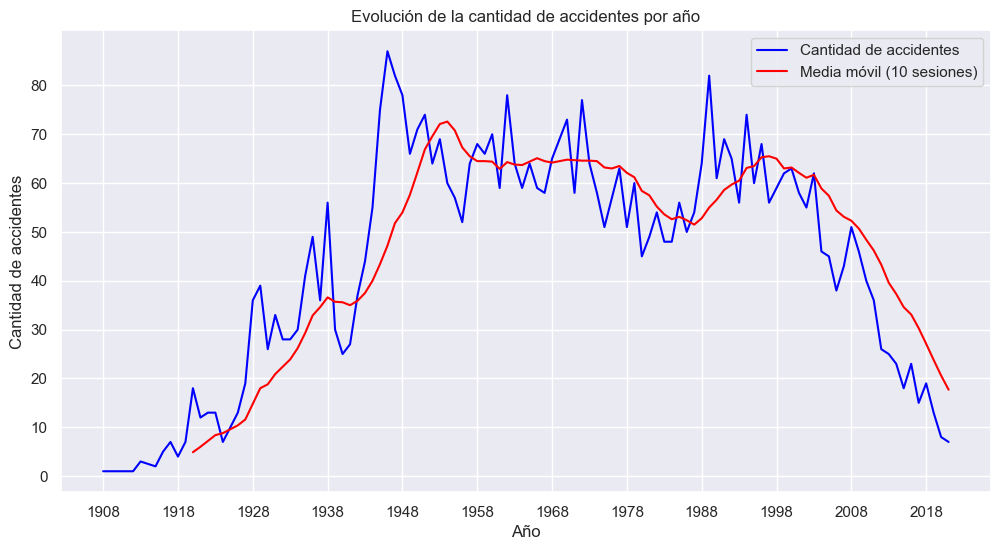

In [1920]:
# Extraemos el año de la columna 'Fecha'
df['Año'] = pd.to_datetime(df['Fecha']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('Año').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='Año', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='Año', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['Año']), max(accidents_by_year['Año'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()


Observando la gráfica superior, podemos decir que la cantidad de accidentes fue yendo cuesta arriba durante los primeros años de la aviación comercial, ya que no se tenía los implementos de rastreo y seguridad de aeronaves. Alrededor de los años 50 esta cantidad de accidentes anuales se estabilizó, permaneciendo así hasta inicios de los 2000. Ya en el nuevo milenio, los accidentes aéreos han ido disminuyendo notablemente su incidencia.

##### c) Cuál fue el año con mayor cantidad de accidentes?

In [1921]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('Año').size().reset_index(name='Conteo_accidentes')

# Ordenamos el DataFrame por la columna 'Conteo_accidentes' de forma descendente
top_10_years = accidents_by_year.sort_values(by='Conteo_accidentes', ascending=False).head(10)

# Mostramos el DataFrame con el top 10 de años ordenados por cantidad de accidentes
top_10_years


,Año,Conteo_accidentes
35,1946,87
36,1947,82
78,1989,82
37,1948,78
51,1962,78
61,1972,77
34,1945,75
40,1951,74
83,1994,74
59,1970,73


El año con mayor cantidad de accidentes fue 1946 con 87 accidentes

##### d) Cuál ha sido el mes histórico con mayor cantidad de accidentes?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1381073051.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidents_by_month, x = 'Mes', y = 'Conteo_accidentes', palette = 'Accent')


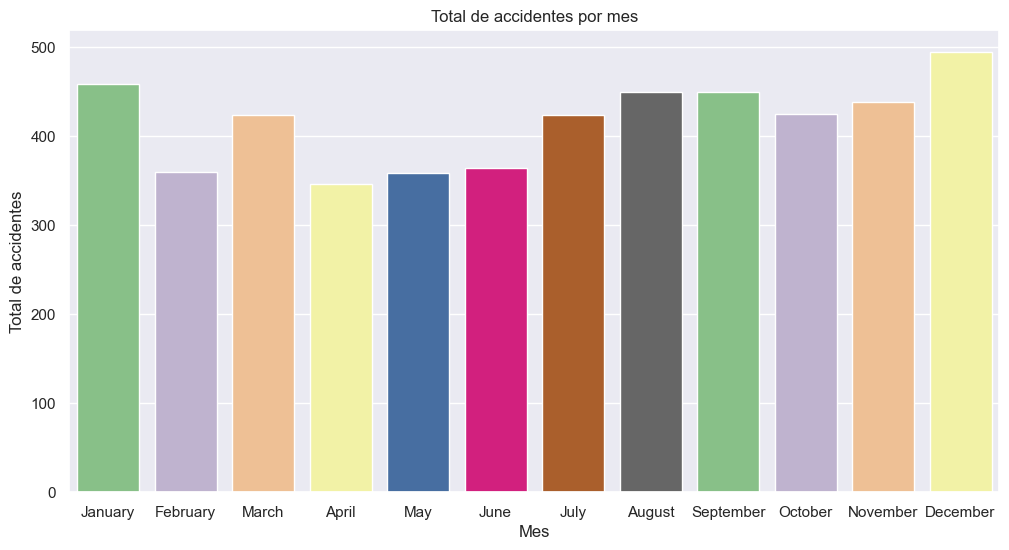

In [1922]:
import calendar

# Extraemos el mes de la columna 'Fecha'
df['Mes'] = pd.to_datetime(df['Fecha']).dt.month

# Obtenemos los nombres de los meses
df['Mes'] = df['Mes'].apply(lambda x: calendar.month_name[x])

# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = df.groupby('Mes').size().reset_index(name='Conteo_accidentes')

# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['Mes'] = pd.Categorical(accidents_by_month['Mes'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('Mes')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x = 'Mes', y = 'Conteo_accidentes', palette = 'Accent')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')

# Mostramos el gráfico
plt.show()

In [1923]:
# Observamos los valores
df_month = accidents_by_month.sort_values('Conteo_accidentes', ascending = False)
df_month

,Mes,Conteo_accidentes
2,December,494
4,January,458
1,August,449
11,September,449
9,November,438
10,October,425
7,March,423
5,July,423
6,June,364
3,February,359


El mes donde más accidentes han ocurrido es Diciembre, probablemente por ser un mes de temporada alta por las festividades  de Navidad y Año Nuevo

##### e) Cuál ha sido el día histórico con mayor cantidad de accidentes?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\3875011420.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidents_by_day, x='Día', y='Conteo_accidentes', palette= 'Accent')


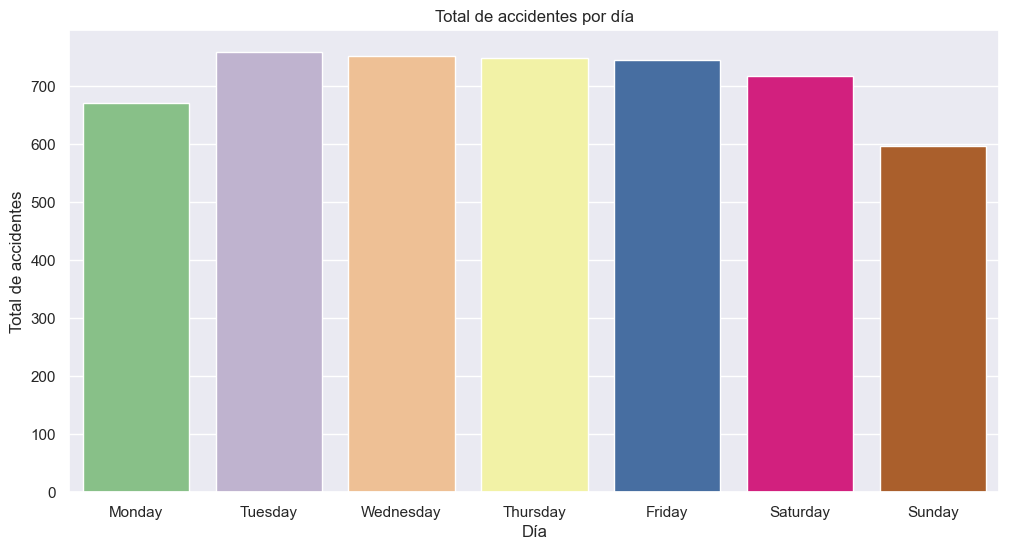

In [1924]:
# Extraemos el día de la columna 'Fecha'
df['Día'] = pd.to_datetime(df['Fecha']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
df['Día'] = df['Día'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = df.groupby('Día').size().reset_index(name='Conteo_accidentes')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['Día'] = pd.Categorical(accidents_by_day['Día'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('Día')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='Día', y='Conteo_accidentes', palette= 'Accent')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')

# Mostramos el gráfico
plt.show()



In [1925]:
# Observamos los valores
df_day = accidents_by_day.sort_values('Conteo_accidentes', ascending = False)
df_day

,Día,Conteo_accidentes
5,Tuesday,758
6,Wednesday,751
4,Thursday,748
0,Friday,744
2,Saturday,717
1,Monday,671
3,Sunday,597


Según los datos, el día de la semana con mayor incidencia en accidentes es el día Martes

##### f) Cuál ha sido la hora histórica con mayor cantidad de accidentes?

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1581710069.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidents_by_hour, x='Hora_del_accidente', y='Conteo_accidentes', palette='GnBu')


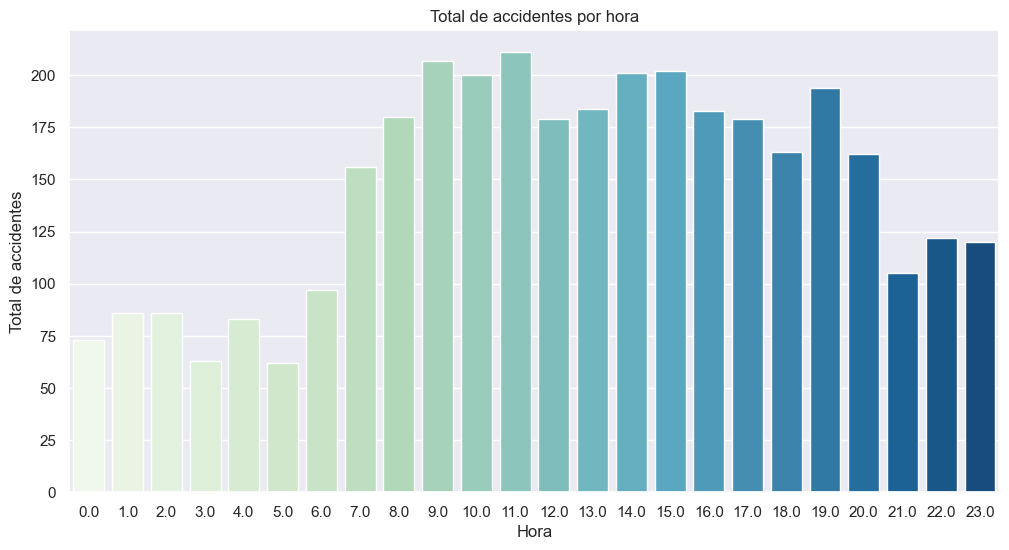

In [1926]:
# Definimos una función para extraer la hora de un string
def extraer_hora(string):
    if isinstance(string, str):  # Verificar si el valor es una cadena
        numeros = re.findall(r'\d+', string)
        if numeros:
            return numeros[0]  # El primer número encontrado representa la hora
    return None  # Si no es una cadena o no se encuentran números, se asigna None

# Aplicar la función a la columna "Hora" y almacenar los resultados en una nueva columna "Hora_del_accidente"
df['Hora_del_accidente'] = df['Hora'].apply(extraer_hora)

# Convertir la columna 'Hora_del_accidente' a tipo numérico
df['Hora_del_accidente'] = pd.to_numeric(df['Hora_del_accidente'], errors='coerce')

# Agrupar por hora y contar la cantidad de accidentes
accidents_by_hour = df.groupby('Hora_del_accidente').size().reset_index(name='Conteo_accidentes')

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_hour, x='Hora_del_accidente', y='Conteo_accidentes', palette='GnBu')

# Establecer etiquetas de los ejes
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')

# Establecer título del gráfico
plt.title('Total de accidentes por hora')

# Mostrar el gráfico
plt.show()


In [1927]:
# Observamos los valores
df_hour = accidents_by_hour.sort_values('Conteo_accidentes', ascending = False)
df_hour

,Hora_del_accidente,Conteo_accidentes
11,11.0,211
9,9.0,207
15,15.0,202
14,14.0,201
10,10.0,200
19,19.0,194
13,13.0,184
16,16.0,183
8,8.0,180
12,12.0,179


La hora en la que ocurrieron la mayor cantidad de accidentes fue a las 11:00 con 211 accidentes

### 6) KPI's

##### a) Tasa de fatalidad de la tripulación. Objetivo: disminuir un 10% la tasa en los últimos 10 años, considerando la década anterior

In [1928]:
# Obtenemos el primer año en tus datos
primer_año = df['Año'].min()

# Creamos una lista para almacenar las tasas de fatalidad por década
tasas_de_fatalidad_por_decada = []

# Iteramos a lo largo de los años desde el primer año hasta 2012
for año_inicial in range(primer_año, 2013):
    # Definimos el año final de la década
    año_final = año_inicial + 9

    # Filtramos los datos para incluir solo los años dentro de la década
    df_decada = df[(df['Año'] >= año_inicial) & (df['Año'] <= año_final)]

    # Calculamos la tasa de fatalidad de la tripulación para la década actual
    total_fallecidos = df_decada['Tripulación_fallecida'].sum()
    total_accidentes = len(df_decada)
    tasa_de_fatalidad = total_fallecidos / total_accidentes

    # Agregamos la tasa de fatalidad al listado de tasas por década, tomando comor referencia el año
    tasas_de_fatalidad_por_decada.append({'Año': f"{año_final}", 'Tripulación_fallecida': total_fallecidos, 'Accidentes':total_accidentes, 'Tasa de Fatalidad': tasa_de_fatalidad})

# Crear un DataFrame a partir de la lista de tasas por década
tasa_tripulación_df = pd.DataFrame(tasas_de_fatalidad_por_decada)

# Imprimir las tasas de fatalidad por década
tasa_tripulación_df



,Año,Tripulación_fallecida,Accidentes,Tasa de Fatalidad
0,1917,42.0,20,2.100000
1,1918,43.0,23,1.869565
2,1919,51.0,29,1.758621
3,1920,69.0,47,1.468085
4,1921,125.0,59,2.118644
...,...,...,...,...
100,2017,1028.0,303,3.392739
101,2018,986.0,271,3.638376
102,2019,846.0,238,3.554622
103,2020,759.0,206,3.684466


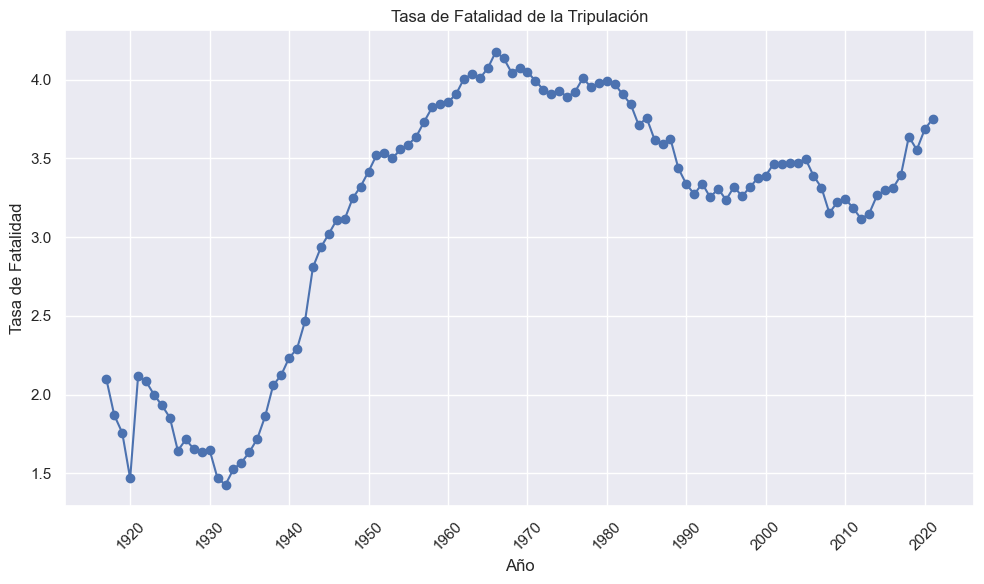

In [1929]:
#Graficamos el KPI

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Extraer las décadas y tasas de fatalidad
décadas = tasa_tripulación_df['Año']
tasas = tasa_tripulación_df['Tasa de Fatalidad']

# Crear un gráfico de línea
plt.plot(décadas, tasas, marker='o', linestyle='-')
plt.title('Tasa de Fatalidad de la Tripulación')
plt.xlabel('Año')
plt.ylabel('Tasa de Fatalidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Establecer las etiquetas del eje x para que solo muestren décadas múltiplos de 10
décadas_múltiplos_de_10 = [d for d in décadas if d.split('-')[0][-1] == '0']
plt.xticks(décadas_múltiplos_de_10)

# Mostrar el gráfico
plt.tight_layout()
plt.grid(True)  # Agregar una cuadrícula al gráfico si lo deseas
plt.show()


Analizando el gráfico, podemos observar que la tasa de fatalidad de la tripulación comienza a crecer desde aproximadamente el año 1930, el cual considera en su tasa el periodo 1920-1930, se presume que en esta época los vuelos comerciales comenzaron a entrar en auge, lo cual devino en un mayor personal de asistencia en los vuelos, esto más los incipientes sistema de seguridad aérea de los primeros años de la aviación nos muestran que la tasa continuó en crecimiento hasta fines del año 1970. De ahí, continuó con una leve disminución hasta el año 2010, para luego continuar subiendo, esta última subida se puede inferir por la magnitud de los aviones actuales, mucho más grandes que los de antaño, los cuales requieren aún más personal, un solo accidente fatal, puede aumentar de manera exponencial esta tasa si el accidente ocurre en aviones de tal tipo

In [1930]:
#Calculamos el cambio porcentual de la tasa en los últimos 10 años
tasa_tripulación_df['Año'] = tasa_tripulación_df['Año'].astype(int)

# Filtramos los datos para incluir solo los últimos 10 años
años_últimos_10 = range(2011, 2022)
df_últimos_10_años = tasa_tripulación_df[tasa_tripulación_df['Año'].isin(años_últimos_10)]

# Calculamos la variación interanual en la tasa de fatalidad
df_últimos_10_años['Cambio'] = df_últimos_10_años['Tasa de Fatalidad'].pct_change()

# Mostramos el DataFrame con el cambio en la tasa de fatalidad año a año
df_últimos_10_años

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\1351723416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_últimos_10_años['Cambio'] = df_últimos_10_años['Tasa de Fatalidad'].pct_change()


,Año,Tripulación_fallecida,Accidentes,Tasa de Fatalidad,Cambio
94,2011,1471.0,462,3.183983,NaN
95,2012,1349.0,433,3.115473,-0.021517
96,2013,1247.0,396,3.148990,0.010758
97,2014,1218.0,373,3.265416,0.036972
98,2015,1141.0,346,3.297688,0.009883
99,2016,1096.0,331,3.311178,0.004091
100,2017,1028.0,303,3.392739,0.024632
101,2018,986.0,271,3.638376,0.072401
102,2019,846.0,238,3.554622,-0.023020
103,2020,759.0,206,3.684466,0.036528


La tasa en si, no presenta cambios significativos en la mayoría de los años, ninguno de los cambios fue de más del 10%, el cambio más significativo se dió en el año 2018, aumentando la tasa de fatalidad en 7,24%. No se cumple el objetivo, teniendo un aumento en la tasa. Como se mencionó, esto posiblemente se deba a que los siniestros ocurren en aviones mucho más grandes y con un mayor número de pasajeros y tripulación, suponemos esto debido a que como se aprecia en los datos, hay menos accidentes y menos tripulación fallecida, pero la tasa sigue aumentando.

##### b) Tasa anual de mortalidad. Objetivo: reducir en un 5% la tasa, año a año

In [1931]:
# Agrupamos por año
mortality_by_year = df.groupby('Año').agg({'Fallecidos': 'sum', 'Total_a_bordo': 'sum'})

# Calculamos la tasa de mortalidad por año
mortality_by_year['Tasa de Mortalidad'] = mortality_by_year['Fallecidos'] / mortality_by_year['Total_a_bordo']

# Observamos los valores
mortality_by_year


,Fallecidos,Total_a_bordo,Tasa de Mortalidad
Año,,,
1908,1,2.0,0.500000
1909,1,1.0,1.000000
1912,5,5.0,1.000000
1913,43,49.0,0.877551
1915,36,60.0,0.600000
...,...,...,...
2017,214,245.0,0.873469
2018,874,1239.0,0.705408
2019,305,432.0,0.706019


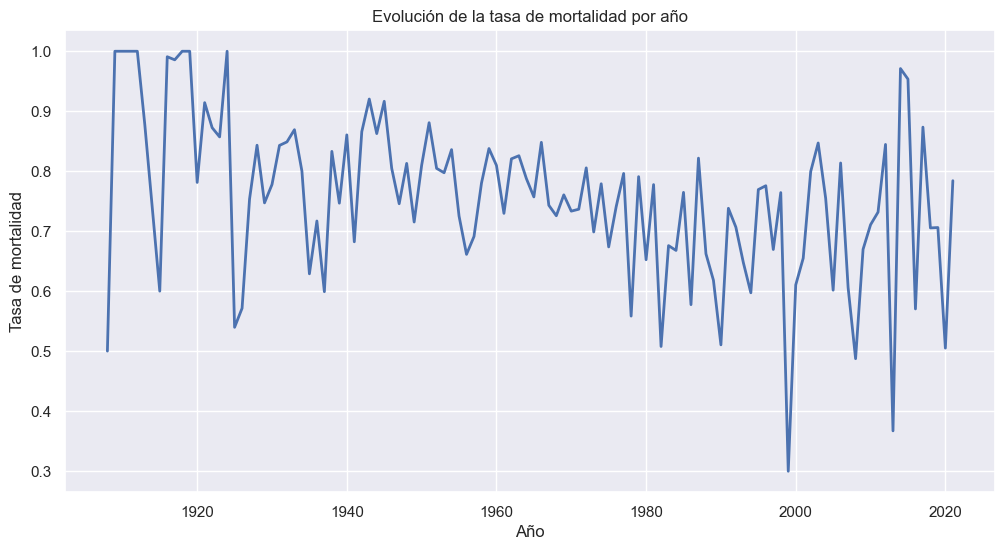

In [1932]:
# Graficamos el KPI

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=mortality_by_year, x=mortality_by_year.index, y='Tasa de Mortalidad', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Evolución de la tasa de mortalidad por año')

# Mostrar el gráfico
plt.show()


Podemos observar mucha volatilidad en los datos, esta es explicable en los primeros años ya que no hay muchas muestras, y esto genera una alta volatilidad, esta va disminuyendo conforme se llega a principio de los 70. De ahí en adelante se presenta otro periodo de volatilidad, esto posiblemente debido a que la toma de mejores medidas de seguridad, ocasione que se genere una menor cantidad de muestras, lo cual genera la volatilidad mencioanda. No se puede observar una media de manera satisfactoria, pero si se puede observar que los mínimos históricos para la tasa se ubican en los últimos años.

In [1933]:
# Filtramos a partir de 2010
mortality_by_year = mortality_by_year[mortality_by_year.index >= 2011]

# Calculamos la variación interanual en la tasa de mortalidad
mortality_by_year['Cambio'] = mortality_by_year['Tasa de Mortalidad'].pct_change()

# Observamos los valores
mortality_by_year

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7992\3553761051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_by_year['Cambio'] = mortality_by_year['Tasa de Mortalidad'].pct_change()


,Fallecidos,Total_a_bordo,Tasa de Mortalidad,Cambio
Año,,,,
2011,720,984.0,0.731707,NaN
2012,587,695.0,0.844604,0.154293
2013,287,782.0,0.367008,-0.565468
2014,1142,1176.0,0.971088,1.645962
2015,759,796.0,0.953518,-0.018094
2016,515,903.0,0.570321,-0.401877
2017,214,245.0,0.873469,0.531540
2018,874,1239.0,0.705408,-0.192407
2019,305,432.0,0.706019,0.000866


Como se apreció anteriormene, los datos presentan una alta volatilidad, en algunos años se cumplió el objetivo como en el año 2013 y el 2017, pero hubo años que aumentó drásticamente como el año 2014.

##### c) Cantidad de Accidentes en Estados Unidos. Objetivo: reducir en un 5% la cantidad cada año

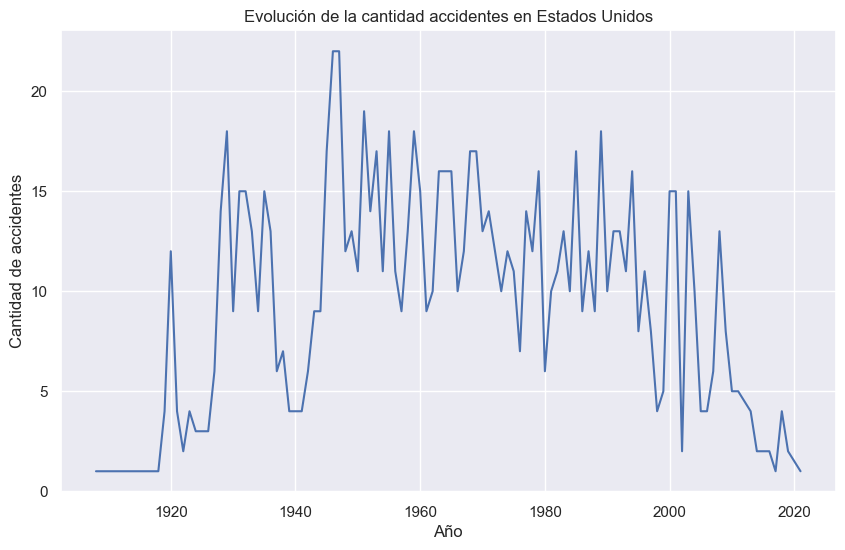

In [1934]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos
df_usa = df[df['Pais'] == 'United States']

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_usa.groupby('Año').size().reset_index(name='Conteo_accidentes')

# Configuramos el estilo
sns.set(style="darkgrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_by_year, x='Año', y='Conteo_accidentes')

# Configuramos el título y las etiquetas de los ejes
plt.title('Evolución de la cantidad accidentes en Estados Unidos')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.show()

A pesar de la volatilidad, podemos mencionar que la cantidad de accidentes aéreos en Estados Unidos ha tenido su punto más alto en los años 70, de ahí en adelante este número ha ido reduciendo su cantidad, esto debido probablemente a mejores medidas de seguridad en los vuelos. 

In [1935]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos en los ultimos 10 años
df_usa_filtered = df[(df['Pais'] == 'United States') & (df['Año'] >= 2011)]

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_usa_filtered.groupby('Año').size().reset_index(name='Conteo_accidentes')

# Calculamos la variación anual de accidentes
accidents_by_year['Variación'] = accidents_by_year['Conteo_accidentes'].pct_change()

# Creamos un nuevo DataFrame con los resultados
accidents_variation_df = accidents_by_year[['Año','Conteo_accidentes', 'Variación']].copy()

# Observamos el dataframe
accidents_variation_df


,Año,Conteo_accidentes,Variación
0,2011,5,NaN
1,2013,4,-0.2
2,2014,2,-0.5
3,2015,2,0.0
4,2016,2,0.0
5,2017,1,-0.5
6,2018,4,3.0
7,2019,2,-0.5
8,2021,1,-0.5


La mayoría de los años hay una reducción en la cantidad de accidentes, por lo que si se está cumpliendo con el objetivo.

### 7) Exportación a csv y mysql

In [1936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  4986 non-null   datetime64[ns]
 1   Hora                   3498 non-null   object        
 2   Lugar                  4986 non-null   object        
 3   Operador_aereo         4986 non-null   object        
 4   Numero_vuelo           4986 non-null   object        
 5   Ruta                   4986 non-null   object        
 6   Tipo_avion             4986 non-null   object        
 7   Total_a_bordo          4986 non-null   float64       
 8   Pasajeros              4782 non-null   float64       
 9   Tripulación            4784 non-null   float64       
 10  Fallecidos             4986 non-null   int64         
 11  Pasajeros_fallecidos   4765 non-null   float64       
 12  Tripulación_fallecida  4766 non-null   float64       
 13  Resumen_

Archivo .csv

In [1937]:
df.to_csv('air_accidents.csv', index=False, sep = ';')

MYSql

In [1938]:
#pip install mysql-connector-python

In [1939]:
# Importamos la librería necesaría
import mysql.connector

# Establecemos la conexión a MySQL
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='*****'
)

# Instanciamos el cursor y creamos la base de datos 'air_flights' si no existe
cursor = cnx.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS air_flights")
cursor.execute("USE air_flights")

# Creamos la tabla 'air_accidents'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS air_accidents(
        Fecha DATE,
        Hora TIME,
        Lugar VARCHAR(250),
        Operador_aereo VARCHAR(250),
        Numero_vuelo VARCHAR(250),
        Ruta VARCHAR(250),
        Tipo_avion VARCHAR(250),
        Total_a_bordo INT,
        Pasajeros INT,
        Tripulación INT,
        Fallecidos INT,
        Pasajeros_fallecidos INT,
        Tripulación_fallecida INT,
        Resumen_accidente VARCHAR(5000),
        Pais VARCHAR(150),
        Superficie VARCHAR(150),
        Categoria VARCHAR(150),
        Marca VARCHAR(150),
        Supervivientes INT,
        Año INT,
        Mes VARCHAR(50),
        Día VARCHAR(50),
        Hora_del_accidente VARCHAR(50)
    )
''')

# Convertimos la columna 'Fecha' a un tipo de datos MySQL DATETIME
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

# Definimos los datos a utilizar
data = df.to_dict('records')

# Escribimos la consulta SQL para insertar un solo registro
insert_query = """
    INSERT INTO air_accidents
    (Fecha, Hora, Lugar, Operador_aereo, Numero_vuelo, Ruta, Tipo_avion, Total_a_bordo, Pasajeros, Tripulación, Fallecidos, Pasajeros_fallecidos, Tripulación_fallecida, Resumen_accidente, Pais, Superficie, Categoria, Marca, Supervivientes, Año, Mes, Día, Hora_del_accidente)
    VALUES
    (%(Fecha)s, %(Hora)s, %(Lugar)s, %(Operador_aereo)s, %(Numero_vuelo)s, %(Ruta)s, %(Tipo_avion)s, %(Total_a_bordo)s, %(Pasajeros)s, %(Tripulación)s, %(Fallecidos)s, %(Pasajeros_fallecidos)s, %(Tripulación_fallecida)s, %(Resumen_accidente)s, %(Pais)s, %(Superficie)s, %(Categoria)s, %(Marca)s, %(Supervivientes)s, %(Año)s, %(Mes)s, %(Día)s, %(Hora_del_accidente)s)
"""

# Ejecutamos la inserción de datos para cada registro
for row in data:
    # Reemplazar los valores NaN por None en el diccionario
    row = {key: None if pd.isna(value) else value for key, value in row.items()}
    cursor.execute(insert_query, row)

# Confirmamos los cambios en la base de datos
cnx.commit()

# Cerrar la conexión
cursor.close()
cnx.close()

In [1940]:
# Cerrar la conexión nuevamente por si tenemos procesos activos
cursor.close()
cnx.close()